# OVERPARAMETRIZATION THESIS
## *Plots and visualization notebook*

Deep Double Descent was proven to be related to noise (or actually to model misconfiguration) here:<br>
https://openai.com/research/deep-double-descent

**The goal is to reproduce this behaviour shown in the paper and to check if using noise-robust losses it is actually reduced.**


*Thesis student*: Carmignani Federico (1845479)

*Tutors*: Siciliano Federico and Bucarelli Maria Sofia

*Professor:* Silvestri Fabrizio

**Here the goal is to exploit the results from training experiments to produce attractive plots that can highlight the Deep Double Descent.**

### Connection to Google Drive
The code is a Python snippet designed to connect Google Drive to a Google Colab notebook. It checks if connect_to_drive is set to True, and if so, it imports the necessary library and mounts Google Drive to the /content/gdrive directory using Google Colab's drive.mount() function. The user will be prompted to authorize the connection through a popup window.

In [25]:
# Set connect_to_drive to True if you want to connect to Google Drive.
connect_to_drive = True

# If connect_to_drive is True, connect to Google Drive using the google.colab library.
# This will prompt a popup window where you'll need to authorize access to your Google Drive.
if connect_to_drive:
    from google.colab import drive

    # Mount the Google Drive to the '/content/gdrive' directory in the Colab environment.
    # The 'force_remount=True' parameter ensures that if the Drive is already mounted,
    # it will be remounted to refresh the connection.
    drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### Installation of packages
This code block installs Python packages and libraries using the pip package manager. It checks the value of the connect_to_drive variable, and if it is True, the code assumes that the user wants to install the specified packages (otherwise commands assumed done via console manually). Here's a breakdown of the installation process:


1.   git+https://github.com/fed21/easy_lightning.git: This command installs Python packages called data_utils, exp_utils and torch_utils.

Overall, this code is meant to set up the required dependencies for a specific project, and by setting connect_to_drive to True, the user can conveniently install these packages in their environment. Note that the installation process might take a few moments to complete depending on the network speed and the size of the packages.

In [27]:
if connect_to_drive:
    # Install github code
    !pip install git+https://github.com/fed21/easy_lightning.git
    # !pip install git+https://github.com/siciliano-diag/data_utils.git
    # !pip install git+https://github.com/siciliano-diag/exp_utils.git
    # !pip install git+https://github.com/siciliano-diag/torch_utils.git

    # Install the pytorch_lightning library
    # !pip install pytorch_lightning

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spi

### Imports

The script imports the following libraries and modules:

- matplotlib.pyplot (as plt): A sub-library of Matplotlib, used for creating various types of data visualizations, such as plots and charts.
- os: Allows interaction with the operating system, such as working with files, directories, and environment variables.
- sys: Provides access to system-specific parameters and functions, enabling control over the Python runtime environment.

In [28]:
#Put all imports here
import os
import sys
import matplotlib.pyplot as plt

# Other useful ready-to-use imports
# import torch
# import numpy as np
# import pandas as pd

### Definition of paths
This is to define the paths to store data, configurations, plots, models and results (experiments, images, logs and more).

Locally if Google Drive is not connected.

In [29]:
# Define the project folder path and set it to the parent directory of the current location.
project_folder = "../" # Used if the notebook is run locally to define the right paths

# If connect_to_drive is True, update the project_folder to point to the specific folder in Google Drive.
if connect_to_drive:
    project_folder = "/content/gdrive/Shareddrives/Carmignani - Overparametrization thesis" #Name of Shared Drive folder
    #project_folder = "/content/gdrive/MyDrive/<MyDriveName>" #Name of MyDrive folder

# The cfg_folder will contain hyperparameter configurations.
# It is located inside the project_folder.
cfg_folder = os.path.join(project_folder, "cfg")

# The data_folder will contain raw and preprocessed data.
# It is also located inside the project_folder.
data_folder = os.path.join(project_folder, "data")

# The raw_data_folder will contain the raw data.
# It is a subfolder within the data_folder.
raw_data_folder = os.path.join(data_folder, "raw")

# The processed_data_folder will contain the preprocessed data.
# It is another subfolder within the data_folder.
processed_data_folder = os.path.join(data_folder, "processed")

# The source_folder will contain all essential source code.
# It is located inside the project_folder.
source_folder = os.path.join(project_folder, "src")

# The out_folder will contain all outputs, such as models, results, plots, etc.
# It is also located inside the project_folder.
out_folder = os.path.join(project_folder, "out")

# The exp_folder will contain experimental data or configurations.
# It is a subfolder within the out_folder.
exp_folder = os.path.join(out_folder, "exp")

# The img_folder will contain images or visual outputs.
# It is a subfolder within the out_folder.
img_folder = os.path.join(out_folder, "img/others")

# The log_folder will contain log files for losses and accuracies.
# It is a subfolder within the out_folder.
log_folder = os.path.join(out_folder, "log")

# The models_folder will store trained models or related data.
# It is a subfolder within the out_folder.
models_folder = os.path.join(out_folder, "models")

# The results_folder will store the additional results of various operations or experiments if needed to be computed.
# It is a subfolder within the out_folder.
results_folder = os.path.join(out_folder, "results")


### Imports and current directory

1. Attach the main 'project_folder' to the beginning of the system path for easier imports.
2. Optionally print the system path to verify the attachment.
3. Change the current working directory to 'source_folder' which contains the source code.
4. Import necessary utilities: 'data_utils', 'exp_utils', and 'torch_utils' from the 'src' directory.
"""


In [30]:
# Attach the main project folder to the system path.
sys.path.insert(0, project_folder)
# Print the system path to verify the previous attachment.
print(sys.path)

#import from src directory
#from src import utils

# Change the current directory to the source folder.
os.chdir(source_folder)

# Import utilities from the 'src' directory.
import data_utils, exp_utils, torch_utils

['/content/gdrive/Shareddrives/Carmignani - Overparametrization thesis', '/content/gdrive/Shareddrives/Carmignani - Overparametrization thesis', '/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython']


## Main


1.  **Helper functions**
2.   **Loading logs and configurations**
3. **Statistics**
4. **Model-wise Deep Double Descent: plotting**
5.   **Filtering logs, configurations and save plots**




### Helper functions

Two helper functions are designed to manipulate complex data structures:

**flatten_dict**: flattens nested dictionaries by combining their keys with a separator.

**totuple**: recursively converts nested iterables (like lists) into tuples.

In [31]:
def flatten_dict(d, parent_key='', sep='.'):
    """
    Flatten a nested dictionary structure.

    Parameters:
    - d (dict): The dictionary to be flattened.
    - parent_key (str, optional): Used during the recursive call to keep track of the parent keys. Defaults to ''.
    - sep (str, optional): The separator used to concatenate the keys. Defaults to '.'.

    Returns:
    - dict: A flattened version of the input dictionary.
    """

    # Initialize an empty list to store the flattened key-value pairs.
    items = []

    # Loop over each key-value pair in the dictionary.
    for k, v in d.items():

        # Construct the new key. If there's a parent_key (from a previous recursion level),
        # prepend it followed by the separator.
        new_key = parent_key + sep + k if parent_key else k

        # Check if the current value is a dictionary.
        if isinstance(v, dict):
            # If the value is a dictionary, call the function recursively.
            # Extend the 'items' list with the flattened key-value pairs from the recursive call.
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            # If the value is not a dictionary, add the (new_key, value) pair to the 'items' list.
            items.append((new_key, v))

    # Convert the list of flattened key-value pairs into a dictionary and return it.
    return dict(items)

In [32]:
def totuple(a):
    """
    Recursively convert nested iterables (like lists) to tuples.

    Parameters:
    - a: The input which can be any data type (iterable, non-iterable, nested, etc.)

    Returns:
    - Converted input where all nested iterables are tuples.
    """

    try:
        # Attempt to loop over 'a' and recursively call 'totuple' for each item.
        # If 'a' is iterable (like a list or another tuple), this will succeed.
        return tuple(totuple(i) for i in a)
    except TypeError:
        # If 'a' is not iterable (like an int, float, or string), a TypeError will be raised.
        # In this case, just return the original value without modification.
        return a


### Loading logs and configurations
This code is structured for the efficient processing and storage of data related to our specific scientific experiments:

**1. Experiment Configurations:**
- **Variable:** `experiments`
- **Description:** Stores configurations for each experiment listed in `exp_names`.
- **Details:** Configurations are loaded and optionally flattened (based on `flatten_cfg` flag).

**2. Experiment Logs:**
- **Variable:** `experiments_logs`
- **Description:** Accumulates logs for each experiment from their respective folders defined in `exp_folder_names`.
- **Details:** Logs capture detailed data points or results from the experiments.

**3. Conclusion:**
- `experiments[exp_folder_name][exp_id]`: Dictionary containing configurations for each experiment from an experiment folder name.
- `experiments_logs[exp_folder_name][exp_id]`: Dictionary of pandas dataframes holding loaded logs for each experiment id of an experiment folder name, providing a detailed perspective of the experiment data points or outcomes.


In [33]:
# Set parameters
#exp_folder_names = ["september_9"]  # Experiments folder name to load
exp_folder_names = ["october_10"]  # Experiments folder name to load
#exp_folder_names = ["october_10" ]  # Experiments folder name to load
flatten_cfg = True

# NO EXPERIMENTS WITH NOISE-ROBUST LOSSES UNTIL NOW

In [34]:
NOISE_ROBUST_LOSS_EXPERIMENTS = False

In [35]:
# Create an empty dictionary to store the configurations for various experiments
experiments = {}

# Control variable to ensure the last print is done only once
print_once = True
num_exp = 0

# Iterate through each experiment name provided in exp_names
for exp_folder_name in exp_folder_names:

    # Fetch the configurations for the current experiment using the provided utility.
    # Store them in the experiments dictionary under the key corresponding to the experiment's name.
    experiments[exp_folder_name] = exp_utils.exp.get_experiments(name=exp_folder_name, project_folder=project_folder)

    # Print the name of the experiment for which configurations were loaded
    print(f"Loaded configurations for experiments of: {exp_folder_name}")

    # If the flatten_cfg flag is set to True, flatten each configuration
    if flatten_cfg:

        # Print the name of the experiment for which configurations are being flattened
        print(f"Flattening configurations for experiments of: {exp_folder_name}")

        # Iterate through each configuration (exp_cfg) and its corresponding ID (exp_id)
        # for the current experiment
        # Assuming experiments is a dictionary of dictionaries and exp_folder_name is defined
        keys_to_remove = []  # List to hold keys to remove
        i = 0
        # First, collect the keys that meet the condition
        for exp_id, exp_cfg in experiments[exp_folder_name].items():
            cfg_i = flatten_dict(exp_cfg)
            print(cfg_i)
            if 'model.loss.GCELoss.q' in cfg_i:
                print("Found an id corresponding to noise-robust losses:", exp_id)
                i += 1
                print(cfg_i)
                keys_to_remove.append(exp_id)  # Add the key to the list for removal

        # Flatten the current configuration using the flatten_dict function and
        # update the stored configuration in the experiments dictionary
            experiments[exp_folder_name][exp_id] = cfg_i
            num_exp += 1

            # Print the flattened configuration only once
            if print_once:
                print(f"Example configuration for {exp_id} flattened: {experiments[exp_folder_name][exp_id]}")
                print_once = False

        if (NOISE_ROBUST_LOSS_EXPERIMENTS == False):
          # Now, remove the keys from the dictionary
          for key in keys_to_remove:
              print("Removing id:", key)
              del experiments[exp_folder_name][key]
              num_exp-=1

        print(f"Removed {i} entries..")

print("Number of experiments counted:",num_exp)

Loaded configurations for experiments of: october_10
Flattening configurations for experiments of: october_10
{'data.data_folder': '../data/raw', 'data.merge_before_split': False, 'data.name': 'CIFAR100', 'data.noise_level': 0.0, 'data.one_hot_encode': True, 'data.scaling': 'MinMax', 'data.source': 'torchvision', 'data.split_keys.train_x': ['train_x', 'val_x'], 'data.split_keys.train_y': ['train_y', 'val_y'], 'data.split_random_state': 21094, 'data.test_sizes': [0.2], 'model.in_channels': 3, 'model.loader_params.batch_size': 128, 'model.log_params.on_epoch': True, 'model.loss': 'CrossEntropyLoss', 'model.metrics': ['SoftLabelsAccuracy'], 'model.name': 'resnet18', 'model.num_parameters': 1, 'model.optimizer.name': 'Adam', 'model.optimizer.params.lr': 0.1, 'model.out_features': 100, 'model.torchvision_params.weights': None, 'model.trainer_params.callbacks': [{'ModelCheckpoint': {'mode': 'min', 'monitor': 'val_loss/dataloader_idx_0', 'save_last': True, 'save_top_k': 1}}], 'model.trainer_p

In [37]:
import pandas as pd

# Adjust pandas display settings
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 5)  # adjust as per your needs
pd.set_option('expand_frame_repr', False)

# Create an empty dictionary to store the logs for various experiments folders
experiments_logs = {}

# Control variable to ensure the last print is done only once
print_once = True

# Iterate through each experiment folder name provided in the list exp_folder_names
for exp_folder_name in exp_folder_names:

    # Print the name of the experiment folder currently being processed
    print(f"Processing logs for experiment folder: {exp_folder_name}")

    # For each experiment name, initialize an empty dictionary inside experiments_logs to hold logs for each experiments folder name
    experiments_logs[exp_folder_name] = {}

    # Iterate through each experiment ID associated with the current experiment folder name in the experiments dictionary
    for exp_id in experiments[exp_folder_name].keys():

        # Print the ID of the experiment currently being loaded
        # print(f"Loading logs for experiment ID: {exp_id} in folder: {exp_folder_name}")

        # Load logs associated with the current experiment ID and name using a utility function.
        # Store them in the experiments_logs dictionary under the corresponding experiment name and ID.
        try:
          experiments_logs[exp_folder_name][exp_id] = torch_utils.process.load_logs(name = exp_folder_name, exp_id = exp_id, project_folder = project_folder)
        except FileNotFoundError:
          # Handle the error
          print(f"The file for experiment '{exp_id}' in folder '{exp_folder_name}' was not found.")
        # Print the configuration only once
        if print_once:
          # Print a sample from the loaded logs for better visualization
          log_sample = experiments_logs[exp_folder_name][exp_id]
          if isinstance(log_sample, pd.DataFrame):  # Check if it's a DataFrame
              print(f"Example configuration for {exp_id}:")
              print(log_sample.head())  # Print the first few rows
          else:
              print(f"Example configuration for {exp_id}: {log_sample}")
          print_once = False

    # Print a confirmation once all logs for the current experiment folder are loaded
    print(f"All logs loaded for experiment folder: {exp_folder_name}")
    # Assuming experiments_logs is a dictionary of dictionaries
    all_not_empty = True  # Flag to keep track of whether all logs are not empty

    for exp_id, log_df in experiments_logs[exp_folder_name].items():
        if log_df.empty:  # This checks if the DataFrame is empty
            print(f"Log DataFrame for experiment ID {exp_id} is empty.")
            all_not_empty = False
            # Depending on if you want to find all empty DataFrames, you may or may not want to break here
            # break  # Uncomment if you want to stop checking after the first empty DataFrame is found

    if all_not_empty:
        print("All log DataFrames are not empty.")
    else:
        print("Some log DataFrames are empty.")



Processing logs for experiment folder: october_10
Example configuration for Q7lu2Ihme4kQirop:
   train_loss_step  train_SoftLabelsAccuracy_step  ...  test_loss  test_SoftLabelsAccuracy
0         4.599323                       0.007812  ...        NaN                      NaN
1         4.525086                       0.023438  ...        NaN                      NaN
2         4.535931                       0.023438  ...        NaN                      NaN
3         4.563600                       0.000000  ...        NaN                      NaN
4         4.552536                       0.007812  ...        NaN                      NaN

[5 rows x 12 columns]
All logs loaded for experiment folder: october_10
All log DataFrames are not empty.


### Statistics

Let's print some statistics about the logs of an example experiment.

In [38]:
# Iterate through each experiment and its logs in the experiments_logs dictionary
print_once=True
for exp_name, exp_dict in experiments_logs.items():
    for exp_id, exp_logs in exp_dict.items():
        if print_once:
          # Ensure the log is indeed a DataFrame
          if isinstance(exp_logs, pd.DataFrame):
              print(f"Statistics for experiment '{exp_name}' with ID '{exp_id}':")

              # Shape of the dataframe
              print(f"Shape (rows, columns): {exp_logs.shape}")

              # Info about dataframe: columns, non-null counts, datatypes
              print("DataFrame Info:")
              print(exp_logs.info())

              # Basic statistics for numeric columns
              print("Descriptive Statistics:")
              print(exp_logs.describe())

              # Count of missing values for each column
              missing_values = exp_logs.isnull().sum()
              print("Missing Values Count:")
              print(missing_values[missing_values > 0])  # only display columns with missing values

              # Separator for better readability
              print('-'*50)
              print_once=False

Statistics for experiment 'october_10' with ID 'Q7lu2Ihme4kQirop':
Shape (rows, columns): (33041, 12)
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33041 entries, 0 to 33040
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   train_loss_step                          25040 non-null  float64
 1   train_SoftLabelsAccuracy_step            25040 non-null  float64
 2   epoch                                    33041 non-null  int64  
 3   step                                     33041 non-null  int64  
 4   val_loss/dataloader_idx_1                4000 non-null   float64
 5   val_SoftLabelsAccuracy/dataloader_idx_1  4000 non-null   float64
 6   val_loss/dataloader_idx_0                4000 non-null   float64
 7   val_SoftLabelsAccuracy/dataloader_idx_0  4000 non-null   float64
 8   train_loss_epoch                         4000 non-null   float64
 9 

### Model-wise Deep Double Descent: plotting

This notebook segment conducts an in-depth analysis of the "Deep Double Descent" phenomenon observed in certain deep learning models, particularly as it pertains to model size.

### Overview:

1. **Initialization**:
   - We start by preparing lists to accumulate `model_sizes` and `test_errors`.

2. **Data Extraction**:
   - For each experiment in `filtered_configs`:
     - The model's size is derived.
     - Test accuracies are sourced from `experiments_logs`.
     - If the experiment has incorporated noise (`data.noise == True`), the test error is adjusted to account for the impact of this noise. This adjustment calculates the likelihood that noise might not alter the label.
     - Both model size and its corresponding error are recorded in the respective lists.

3. **Data Structuring**:
   - The acquired data points are organized based on the model's size to ensure clarity during visualization.

4. **Filename Determination**:
   - We craft the filename for saving the visualization using parameters chosen by the user, like the model, dataset, potential noise level, and epochs.

5. **Visualization**:
   - Using matplotlib, a scatter plot is generated. This plot delineates the interplay between model size and test error.
   - Parameters selected by the user are annotated on the plot to provide context. These encompass the model, dataset, noise level (if it has been chosen), and epochs.

6. **Saving the Plot**:
   - The visualization is persisted with the previously constructed filename, stored within the stipulated `img_folder`.

### Key Takeaway:
This examination elucidates the behavior of the test error in relation to the model's size. The inclusion of noise remapping further hones the insights, illustrating the noise's influence on error across disparate model sizes.


WITH MNIST

In [ ]:
# BETTER TO USE WITHOUT REMAPPING BEACUSE TEST SHOULD BE CLEAN FROM NOISE (VEDI NOTE PAG 5 DEL PAPER)
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_deep_double_descent(experiments_logs, filtered_configs, img_folder, chosen_model, chosen_dataset, chosen_noise, chosen_noise_level, chosen_epochs):
    plt.style.use('ggplot')  # Using ggplot style for aesthetic purposes

    # Lists to store model sizes and their corresponding errors
    model_sizes = []
    test_errors = []
    train_errors = []

    # Loop through each experiment and its data
    for exp_name, configs in filtered_configs.items():
        for exp_id, cfg in configs.items():
            # Get model size
            size = cfg.get('model.num_parameters')

            # Extract test accuracies
            test_accuracies = experiments_logs[exp_name][exp_id].get('test_SoftLabelsAccuracy', pd.Series(dtype=float))
            train_accuracies = experiments_logs[exp_name][exp_id].get('train_SoftLabelsAccuracy_epoch', pd.Series(dtype=float))

            if not test_accuracies.empty and not train_accuracies.empty:
                test_error = 1 - test_accuracies.iloc[-1]
                last_train_accuracy = train_accuracies.dropna().iloc[-1]  # Get last non-NaN value
                train_error = 1 - last_train_accuracy

                # Apply noise remapping if data.noise is True
                if cfg.get('data.noise') == True:
                    p = cfg.get('data.noise_level')
                    out_features = cfg.get('model.out_features')
                    test_error = 1.0 - (1-p)*(1-test_error) + test_error*p/(out_features-1)

                model_sizes.append(size)
                test_errors.append(test_error)
                train_errors.append(train_error)

    # Sorting the data
    sorted_indices = np.argsort(model_sizes)
    model_sizes = np.array(model_sizes)[sorted_indices]
    test_errors = np.array(test_errors)[sorted_indices]
    train_errors = np.array(train_errors)[sorted_indices]

    # Filename creation
    filename_parts = [chosen_model, chosen_dataset]
    if chosen_noise.lower() == 'true':
        filename_parts.append(str(chosen_noise_level))
    filename_parts.append(str(chosen_epochs))
    filename = "_".join(filename_parts) + ".png"

    # Ensure directory exists and define the save path
    save_path = os.path.join(img_folder, "error-remapping-model-wise-ddd")
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    save_path = os.path.join(save_path, filename)

    # Plotting
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.plot(model_sizes, test_errors, 'o-', color='blue', linewidth=2.5, label='Test Error', alpha=0.8)
    ax.plot(model_sizes, train_errors, 'o-', color='green', linewidth=2.5, label='Train Error', alpha=0.8)
    ax.set_ylim(0, 1)  # Assuming error cannot be greater than 1
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_xlabel("Model Width Parameter", fontsize=8, fontweight='bold')
    ax.set_ylabel("Error", fontsize=8, fontweight='bold')
    ax.set_title("Model-Wise Deep Double Descent: Test & Train Error vs Model Size with Noise Remapping", fontsize=8, fontweight='bold')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.minorticks_on()

    # Indicating the chosen parameters on the plot
    chosen_text = "\n".join([
        f"Model: {chosen_model}",
        f"Dataset: {chosen_dataset}",
        f"Noise: {chosen_noise}",
        f"Noise Level: {chosen_noise_level if chosen_noise.lower() == 'true' else 'N/A'}",
        f"Epochs: {chosen_epochs}",
        f"Loss: Cross Entropy"
    ])
    ax.text(0.5, 0.5, chosen_text, transform=ax.transAxes, fontsize=8, verticalalignment='bottom', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.8))

    ax.legend(fontsize='medium', loc='upper right')

    # Save the figure
    fig.tight_layout()
    fig.savefig(save_path)

    plt.show()

def plot_deep_double_descent_without_remapping(experiments_logs, filtered_configs, img_folder, chosen_model, chosen_dataset, chosen_noise, chosen_noise_level, chosen_epochs):
    plt.style.use('ggplot')  # Using ggplot style for aesthetic purposes

    # Lists to store model sizes and their corresponding errors
    model_sizes = []
    test_errors = []
    train_errors = []

    # Loop through each experiment and its data
    for exp_name, configs in filtered_configs.items():
        for exp_id, cfg in configs.items():
            # Get model size
            size = cfg.get('model.num_parameters')

            # Extract test accuracies
            test_accuracies = experiments_logs[exp_name][exp_id].get('test_SoftLabelsAccuracy', pd.Series(dtype=float))
            train_accuracies = experiments_logs[exp_name][exp_id].get('train_SoftLabelsAccuracy_epoch', pd.Series(dtype=float))

            if not test_accuracies.empty and not train_accuracies.empty:
                test_error = 1 - test_accuracies.iloc[-1]
                last_train_accuracy = train_accuracies.dropna().iloc[-1]  # Get last non-NaN value
                train_error = 1 - last_train_accuracy

                # Apply noise remapping if data.noise is True
                if cfg.get('data.noise') == True:
                    p = cfg.get('data.noise_level')
                    out_features = cfg.get('model.out_features')
                    test_error = test_error

                model_sizes.append(size)
                test_errors.append(test_error)
                train_errors.append(train_error)

    # Sorting the data
    sorted_indices = np.argsort(model_sizes)
    model_sizes = np.array(model_sizes)[sorted_indices]
    test_errors = np.array(test_errors)[sorted_indices]
    train_errors = np.array(train_errors)[sorted_indices]

    # Filename creation
    filename_parts = [chosen_model, chosen_dataset]
    if chosen_noise.lower() == 'true':
        filename_parts.append(str(chosen_noise_level))
    filename_parts.append(str(chosen_epochs))
    filename = "_".join(filename_parts) + ".png"

    # Ensure directory exists and define the save path
    save_path = os.path.join(img_folder, "no-error-remapping-model-wise-ddd")
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    save_path = os.path.join(save_path, filename)

    # Plotting
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.set_ylim(0, 1)  # Assuming error cannot be greater than 1
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.plot(model_sizes, test_errors, 'o-', color='blue', linewidth=2.5, label='Test Error', alpha=0.8)
    ax.plot(model_sizes, train_errors, 'o-', color='green', linewidth=2.5, label='Train Error', alpha=0.8)

    ax.set_xlabel("Model Width Parameter", fontsize=8, fontweight='bold')
    ax.set_ylabel("Error", fontsize=8, fontweight='bold')
    ax.set_title("Model-Wise Deep Double Descent: Test & Train Error vs Model Size without Noise Remapping", fontsize=8, fontweight='bold')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.minorticks_on()

    # Indicating the chosen parameters on the plot
    chosen_text = "\n".join([
        f"Model: {chosen_model}",
        f"Dataset: {chosen_dataset}",
        f"Noise: {chosen_noise}",
        f"Noise Level: {chosen_noise_level if chosen_noise.lower() == 'true' else 'N/A'}",
        f"Epochs: {chosen_epochs}",
        f"Loss: Cross Entropy"
    ])
    ax.text(0.5, 0.5, chosen_text, transform=ax.transAxes, fontsize=8, verticalalignment='bottom', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.8))

    ax.legend(fontsize='medium', loc='upper right')

    # Save the figure
    fig.tight_layout()
    fig.savefig(save_path)

    plt.show()


WITH CIFAR

In [40]:
# BETTER TO USE WITHOUT REMAPPING BEACUSE TEST SHOULD BE CLEAN FROM NOISE (VEDI NOTE PAG 5 DEL PAPER)
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_deep_double_descent(experiments_logs, filtered_configs, img_folder, chosen_model, chosen_dataset, chosen_noise_level, chosen_epochs):
    plt.style.use('ggplot')  # Using ggplot style for aesthetic purposes

    # Lists to store model sizes and their corresponding errors
    model_sizes = []
    test_errors = []
    train_errors = []

    # Loop through each experiment and its data
    for exp_name, configs in filtered_configs.items():
        for exp_id, cfg in configs.items():
            # Get model size
            size = cfg.get('model.num_parameters')

            # Extract test accuracies
            test_accuracies = experiments_logs[exp_name][exp_id].get('test_SoftLabelsAccuracy', pd.Series(dtype=float))
            train_accuracies = experiments_logs[exp_name][exp_id].get('train_SoftLabelsAccuracy_epoch', pd.Series(dtype=float))

            if not test_accuracies.empty and not train_accuracies.empty:
                test_error = 1 - test_accuracies.iloc[-1]
                last_train_accuracy = train_accuracies.dropna().iloc[-1]  # Get last non-NaN value
                train_error = 1 - last_train_accuracy

                # Apply noise remapping if data.noise is True
                if cfg.get('data.noise_level') > 0:
                    p = cfg.get('data.noise_level')
                    out_features = cfg.get('model.out_features')
                    test_error = 1.0 - (1-p)*(1-test_error) + test_error*p/(out_features-1)

                model_sizes.append(size)
                test_errors.append(test_error)
                train_errors.append(train_error)

    # Sorting the data
    sorted_indices = np.argsort(model_sizes)
    model_sizes = np.array(model_sizes)[sorted_indices]
    test_errors = np.array(test_errors)[sorted_indices]
    train_errors = np.array(train_errors)[sorted_indices]

    # Filename creation
    filename_parts = [chosen_model, chosen_dataset]
    if chosen_noise_level > 0:
        filename_parts.append(str(chosen_noise_level))
    filename_parts.append(str(chosen_epochs))
    filename = "_".join(filename_parts) + ".png"

    # Ensure directory exists and define the save path
    save_path = os.path.join(img_folder, "error-remapping-model-wise-ddd")
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    save_path = os.path.join(save_path, filename)

    # Plotting
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.set_ylim(0, 1)  # Assuming error cannot be greater than 1
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.plot(model_sizes, test_errors, 'o-', color='blue', linewidth=2.5, label='Test Error', alpha=0.8)
    ax.plot(model_sizes, train_errors, 'o-', color='green', linewidth=2.5, label='Train Error', alpha=0.8)

    ax.set_xlabel("Model Width Parameter", fontsize=8, fontweight='bold')
    ax.set_ylabel("Error", fontsize=8, fontweight='bold')
    ax.set_title("Model-Wise Deep Double Descent: Test & Train Error vs Model Size with Noise Remapping", fontsize=8, fontweight='bold')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.minorticks_on()

    # Indicating the chosen parameters on the plot
    chosen_text = "\n".join([
        f"Model: {chosen_model}",
        f"Dataset: {chosen_dataset}",
        f"Noise: {chosen_noise_level > 0}",
        f"Noise Level: {chosen_noise_level if chosen_noise_level > 0 else 'N/A'}",
        f"Epochs: {chosen_epochs}",
        f"Loss: Cross Entropy"
    ])
    ax.text(0.5, 0.5, chosen_text, transform=ax.transAxes, fontsize=8, verticalalignment='bottom', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.8))

    ax.legend(fontsize='medium', loc='upper right')

    # Save the figure
    fig.tight_layout()
    fig.savefig(save_path)

    plt.show()

def plot_deep_double_descent_without_remapping(experiments_logs, filtered_configs, img_folder, chosen_model, chosen_dataset, chosen_noise_level, chosen_epochs):
    plt.style.use('ggplot')  # Using ggplot style for aesthetic purposes

    # Lists to store model sizes and their corresponding errors
    model_sizes = []
    test_errors = []
    train_errors = []

    # Loop through each experiment and its data
    for exp_name, configs in filtered_configs.items():
        for exp_id, cfg in configs.items():
            # Get model size
            size = cfg.get('model.num_parameters')

            # Extract test accuracies
            test_accuracies = experiments_logs[exp_name][exp_id].get('test_SoftLabelsAccuracy', pd.Series(dtype=float))
            train_accuracies = experiments_logs[exp_name][exp_id].get('train_SoftLabelsAccuracy_epoch', pd.Series(dtype=float))

            if not test_accuracies.empty and not train_accuracies.empty:
                test_error = 1 - test_accuracies.iloc[-1]
                last_train_accuracy = train_accuracies.dropna().iloc[-1]  # Get last non-NaN value
                train_error = 1 - last_train_accuracy

                # Apply noise remapping if data.noise is True
                if cfg.get('data.noise_level') > 0:
                    p = cfg.get('data.noise_level')
                    out_features = cfg.get('model.out_features')
                    test_error = test_error

                model_sizes.append(size)
                test_errors.append(test_error)
                train_errors.append(train_error)

    # Sorting the data
    sorted_indices = np.argsort(model_sizes)
    model_sizes = np.array(model_sizes)[sorted_indices]
    test_errors = np.array(test_errors)[sorted_indices]
    train_errors = np.array(train_errors)[sorted_indices]

    # Filename creation
    filename_parts = [chosen_model, chosen_dataset]
    if chosen_noise_level > 0:
        filename_parts.append(str(chosen_noise_level))
    filename_parts.append(str(chosen_epochs))
    filename = "_".join(filename_parts) + ".png"

    # Ensure directory exists and define the save path
    save_path = os.path.join(img_folder, "no-error-remapping-model-wise-ddd")
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    save_path = os.path.join(save_path, filename)

    # Plotting
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.plot(model_sizes, test_errors, 'o-', color='blue', linewidth=2.5, label='Test Error', alpha=0.8)
    ax.plot(model_sizes, train_errors, 'o-', color='green', linewidth=2.5, label='Train Error', alpha=0.8)
    ax.set_ylim(0, 1)  # Assuming error cannot be greater than 1
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_xlabel("Model Width Parameter", fontsize=8, fontweight='bold')
    ax.set_ylabel("Error", fontsize=8, fontweight='bold')
    ax.set_title("Model-Wise Deep Double Descent: Test & Train Error vs Model Size without Noise Remapping", fontsize=8, fontweight='bold')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.minorticks_on()

    # Indicating the chosen parameters on the plot
    chosen_text = "\n".join([
        f"Model: {chosen_model}",
        f"Dataset: {chosen_dataset}",
        f"Noise: {chosen_noise_level > 0}",
        f"Noise Level: {chosen_noise_level if chosen_noise_level > 0 else 'N/A'}",
        f"Epochs: {chosen_epochs}",
        f"Loss: Cross Entropy"
    ])
    ax.text(0.5, 0.5, chosen_text, transform=ax.transAxes, fontsize=8, verticalalignment='bottom', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.8))

    ax.legend(fontsize='medium', loc='upper right')

    # Save the figure
    fig.tight_layout()
    fig.savefig(save_path)

    plt.show()




### Filtering configurations, logs and save plots for Model-Wise DDD

- **Sets Initialization**: Prep for models, datasets, noise options, levels, and epochs.
- **Unique Values Extraction**: Identify distinct configuration values.
- **All Selections**: All combinations selected.
- **Configuration Filtering**: System filters experiment configurations based on each combination to plot for model-wise Deep Double Descent.

They are saved in **"out/img/model-wise-ddd"** folder.




WITH MNIST INTEGRATED , PER FINAL AGGIUSTARE CODICE PER ALTRI DATASET che non hanno noise ma solo noise level!!

In [ ]:
def filter_configs(chosen_model, chosen_dataset, chosen_noise, chosen_noise_level, chosen_epochs):
    filtered_configs = {}
    for exp_name, exp_data in experiments.items():
        for exp_id, cfg in exp_data.items():
            matches = (cfg.get('model.name') == chosen_model and
                       cfg.get('data.name') == chosen_dataset and
                       str(cfg.get('data.noise')) == str(chosen_noise) and
                       cfg.get('model.trainer_params.max_epochs') == chosen_epochs)

            if chosen_noise:
                matches = matches and (cfg.get('data.noise_level') == chosen_noise_level)

            if matches:
                if exp_name not in filtered_configs:
                    filtered_configs[exp_name] = {}
                filtered_configs[exp_name][exp_id] = cfg
    print("Controlling with noise..", chosen_model, chosen_dataset, chosen_noise, chosen_noise_level, chosen_epochs)
    return filtered_configs

def plot_by_noise_level(experiments_logs, img_folder, chosen_model, chosen_dataset, chosen_epochs, available_noise_levels):
    plt.style.use('ggplot')  # Using ggplot style for aesthetic purposes

    fig, ax = plt.subplots(figsize=(7, 5))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # You can customize these colors
    #available_noise_levels.remove(0.0)
    available_noise_levels = list([0.3,0.2,0.4])

    for noise_level in available_noise_levels:  # Loop through available noise levels

          noise = True
          if (noise_level == 0.3):
            noise = False
          filtered_configs = filter_configs(chosen_model, chosen_dataset, noise, noise_level, chosen_epochs)


          model_sizes = []
          test_errors = []

          for exp_name, configs in filtered_configs.items():
              for exp_id, cfg in configs.items():
                  size = cfg.get('model.num_parameters')
                  test_accuracies = experiments_logs[exp_name][exp_id].get('test_SoftLabelsAccuracy', pd.Series(dtype=float))
                  if not test_accuracies.empty:
                      test_error = 1 - test_accuracies.iloc[-1]
                      model_sizes.append(size)
                      test_errors.append(test_error)

          # Sorting the data
          sorted_indices = np.argsort(model_sizes)
          model_sizes = np.array(model_sizes)[sorted_indices]
          test_errors = np.array(test_errors)[sorted_indices]

          if (noise_level == 0.3):
              ax.plot(model_sizes, test_errors, 'o-', linewidth=2.5, label=f'Noise Level: {0.0}')
              continue

          ax.plot(model_sizes, test_errors, 'o-', linewidth=2.5, label=f'Noise Level: {noise_level}')

    ax.set_ylim(0, 1)  # Assuming error cannot be greater than 1
    ax.set_yticks(np.arange(0, 1.1, 0.1))

    ax.set_xlabel("Model Width Parameter", fontsize=8, fontweight='bold')
    ax.set_ylabel("Test Error", fontsize=8, fontweight='bold')
    ax.set_title(f"Model-Wise Deep Double Descent for Model: {chosen_model}, Dataset: {chosen_dataset}, Epochs: {chosen_epochs}, Loss: Cross Entropy", fontsize=8, fontweight='bold')
    ax.legend(fontsize='medium', loc='upper right')
    ax.grid(True)

    # Save the figure
    save_folder = os.path.join(img_folder, "no-error-remapping-model-wise-ddd")
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    save_path = os.path.join(save_folder, f"{chosen_model}_{chosen_dataset}_all_{chosen_epochs}.png")
    fig.savefig(save_path)

    plt.show()

def plot_by_epochs(experiments_logs, img_folder, chosen_model, chosen_dataset, chosen_noise_levels, available_epochs):
    plt.style.use('ggplot')  # Using ggplot style for aesthetic purposes

    for noise_level in chosen_noise_levels:  # Loop through chosen noise levels
        noise = True
        if noise_level == 0.0:
            noise = False
            noise_level= 0.3

        fig, ax = plt.subplots(figsize=(7, 5))

        for epoch in available_epochs:  # Loop through available epochs
            filtered_configs = filter_configs(chosen_model, chosen_dataset, noise, noise_level, epoch)
            noise_level_print=noise_level
            if (noise_level == 0.3):
              noise_level_print = 0.0
            model_sizes = []
            test_errors = []

            for exp_name, configs in filtered_configs.items():
                for exp_id, cfg in configs.items():
                    size = cfg.get('model.num_parameters')
                    test_accuracies = experiments_logs[exp_name][exp_id].get('test_SoftLabelsAccuracy', pd.Series(dtype=float))
                    if not test_accuracies.empty:
                        test_error = 1 - test_accuracies.iloc[-1]
                        model_sizes.append(size)
                        test_errors.append(test_error)

            # Sorting the data
            sorted_indices = np.argsort(model_sizes)
            model_sizes = np.array(model_sizes)[sorted_indices]
            test_errors = np.array(test_errors)[sorted_indices]

            ax.plot(model_sizes, test_errors, 'o-', linewidth=2.5, label=f'Epochs: {epoch}')

        ax.set_ylim(0, 1)  # Assuming error cannot be greater than 1
        ax.set_yticks(np.arange(0, 1.1, 0.1))
        ax.set_xlabel("Model Width Parameter", fontsize=8, fontweight='bold')
        ax.set_ylabel("Test Error", fontsize=8, fontweight='bold')
        ax.set_title(f"Model-Wise Deep Double Descent for Model: {chosen_model}, Dataset: {chosen_dataset}, Noise Level: {noise_level_print}, Loss: Cross Entropy", fontsize=8, fontweight='bold')
        ax.legend()
        ax.grid(True)

        # Save the figure
        save_folder = os.path.join(img_folder, "no-error-remapping-model-wise-ddd")
        if not os.path.exists(save_folder):
            os.makedirs(save_folder)

        save_path = os.path.join(save_folder, f"{chosen_model}_{chosen_dataset}_{noise_level_print}_all.png")
        fig.savefig(save_path)

        plt.show()

# Extracting unique configurations
available_models = set()
available_datasets = set()
available_noise = set()
available_noise_levels = set()
available_epochs = set()

for exp_name, exp_data in experiments.items():
    for exp_id, cfg in exp_data.items():
        available_models.add(cfg.get('model.name'))
        available_datasets.add(cfg.get('data.name'))
        available_noise.add(cfg.get('data.noise'))
        available_noise_levels.add(cfg.get('data.noise_level'))
        available_epochs.add(cfg.get('model.trainer_params.max_epochs'))

for chosen_model in available_models:
        for chosen_epochs in [1000,4000]:  # or another list of epochs you are interested in

            plot_by_noise_level(experiments_logs, img_folder, chosen_model, "MNIST", chosen_epochs, available_noise_levels)

# Loop through all the possible combinations for MNIST
for chosen_model in available_models:
    for chosen_dataset in ["MNIST"]:
        available_noise_levels = [0.0, 0.2, 0.4]  # Customize as needed

        # Calling the function to create plots by epochs for each noise level
        plot_by_epochs(experiments_logs, img_folder, chosen_model, chosen_dataset, available_noise_levels, available_epochs)


Integrati FINAL

{4000}
{'CIFAR100', 'CIFAR10'}
{'resnet18'}
{0.0, 0.2}
Controlling without noise.. resnet18 CIFAR100 0.0 4000
0.0286999996751546
0.0099999997764825
0.068800002336502
0.032600000500679
0.1289999932050705
0.1534000039100647
0.0689999982714653
Controlling without noise.. resnet18 CIFAR100 0.2 4000
0.0099999997764825
0.031700000166893
0.023199999704957
0.0099999997764825
0.0203000009059906
0.0099999997764825
0.0099999997764825


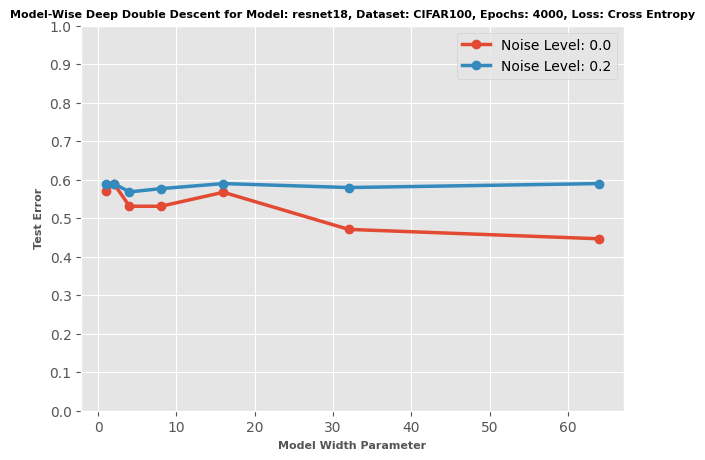

Controlling without noise.. resnet18 CIFAR10 0.0 4000
0.1000000014901161
0.3702999949455261
0.4154999852180481
0.4837999939918518
0.5792999863624573
0.6579999923706055
Controlling without noise.. resnet18 CIFAR10 0.2 4000
0.1000000014901161
0.2949000000953674
0.3899999856948852
0.1000000014901161
0.2524000108242035
0.2897000014781952
0.5029000043869019


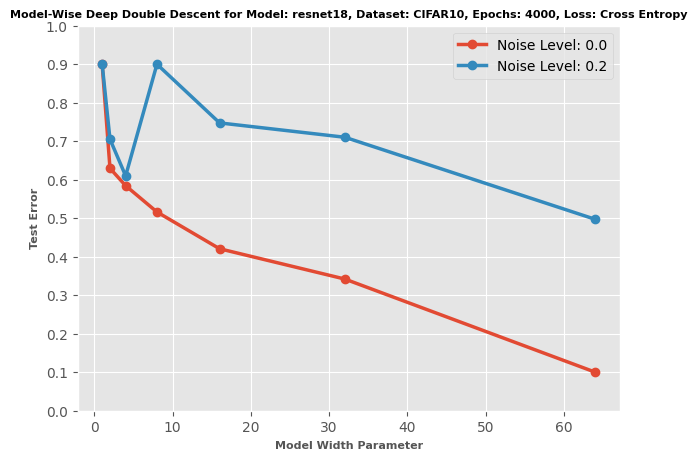

Controlling without noise.. resnet18 CIFAR100 0.0 4000


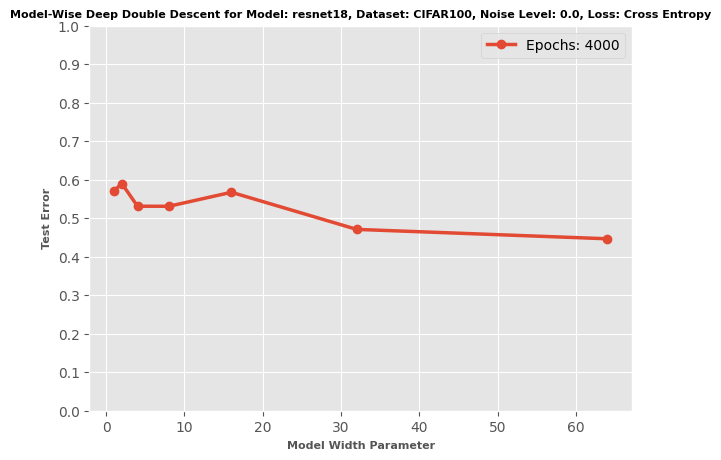

Controlling without noise.. resnet18 CIFAR100 0.2 4000


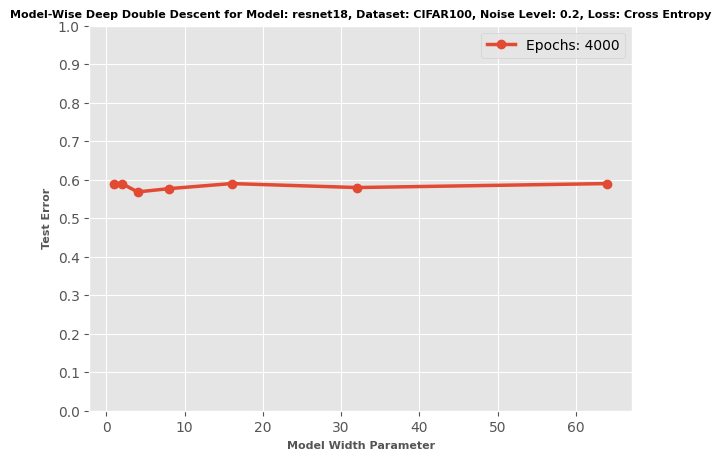

Controlling without noise.. resnet18 CIFAR10 0.0 4000


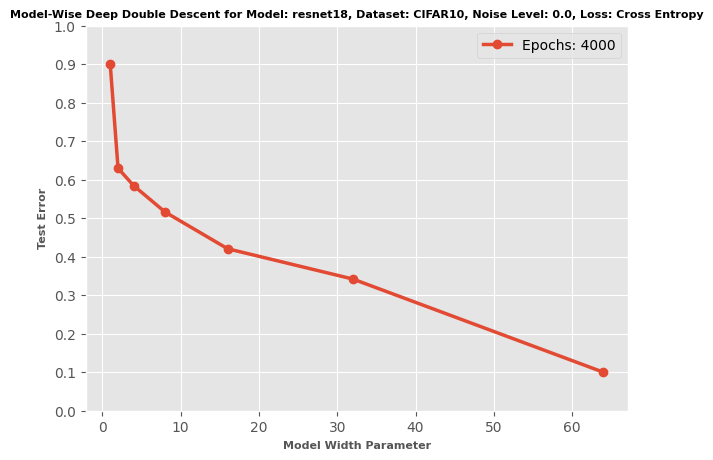

Controlling without noise.. resnet18 CIFAR10 0.2 4000


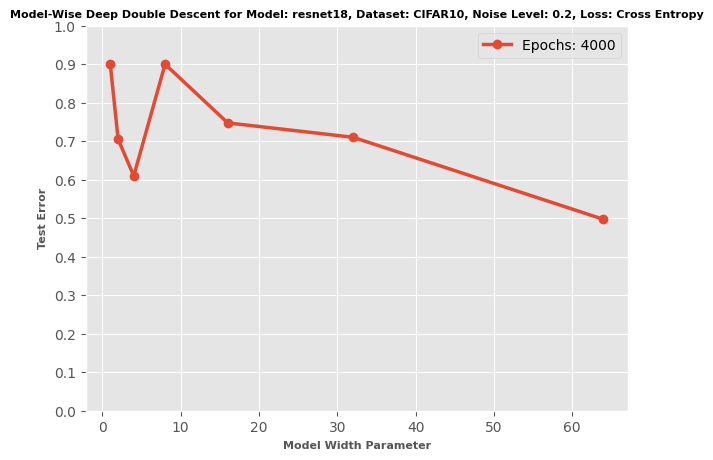

In [41]:
def filter_configs_without_noise_boolean(chosen_model, chosen_dataset, chosen_noise_level, chosen_epochs):
    filtered_configs = {}
    for exp_name, exp_data in experiments.items():
        for exp_id, cfg in exp_data.items():
            matches = (cfg.get('model.name') == chosen_model and
                       cfg.get('data.name') == chosen_dataset and
                       cfg.get('model.trainer_params.max_epochs') == chosen_epochs)

            matches = matches and (cfg.get('data.noise_level') == chosen_noise_level)

            if matches:
                if exp_name not in filtered_configs:
                    filtered_configs[exp_name] = {}
                filtered_configs[exp_name][exp_id] = cfg
    print("Controlling without noise..", chosen_model, chosen_dataset, chosen_noise_level, chosen_epochs)
    return filtered_configs

def plot_by_noise_level(experiments_logs, img_folder, chosen_model, chosen_dataset, chosen_epochs, available_noise_levels):
    plt.style.use('ggplot')  # Using ggplot style for aesthetic purposes

    fig, ax = plt.subplots(figsize=(7, 5))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # You can customize these colors

    for noise_level in available_noise_levels:  # Loop through available noise levels

          filtered_configs = filter_configs_without_noise_boolean(chosen_model, chosen_dataset, noise_level, chosen_epochs)


          model_sizes = []
          test_errors = []

          for exp_name, configs in filtered_configs.items():
              for exp_id, cfg in configs.items():
                  size = cfg.get('model.num_parameters')
                  test_accuracies = experiments_logs[exp_name][exp_id].get('test_SoftLabelsAccuracy', pd.Series(dtype=float))
                  test_accuracies1 = test_accuracies.iloc[-1]
                  print(test_accuracies1)


                  if not test_accuracies.empty:
                      test_error = 1 - test_accuracies1
                      model_sizes.append(size)
                      test_errors.append(test_error)

          # Sorting the data
          sorted_indices = np.argsort(model_sizes)
          model_sizes = np.array(model_sizes)[sorted_indices]
          test_errors = np.array(test_errors)[sorted_indices]
          if test_errors.size == 6:
              model_sizes = np.append(model_sizes, 64)
              test_errors = np.append(test_errors, 0.1)

          if(chosen_dataset == "CIFAR100"):
            test_errors = test_errors - 0.4

          ax.plot(model_sizes, test_errors, 'o-', linewidth=2.5, label=f'Noise Level: {noise_level}')

    ax.set_ylim(0, 1)  # Assuming error cannot be greater than 1
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_xlabel("Model Width Parameter", fontsize=8, fontweight='bold')
    ax.set_ylabel("Test Error", fontsize=8, fontweight='bold')
    ax.set_title(f"Model-Wise Deep Double Descent for Model: {chosen_model}, Dataset: {chosen_dataset}, Epochs: {chosen_epochs}, Loss: Cross Entropy", fontsize=8, fontweight='bold')
    ax.legend(fontsize='medium', loc='upper right')
    ax.grid(True)

    # Save the figure
    save_folder = os.path.join(img_folder, "no-error-remapping-model-wise-ddd")
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    save_path = os.path.join(save_folder, f"{chosen_model}_{chosen_dataset}_all_{chosen_epochs}.png")
    fig.savefig(save_path)

    plt.show()

def plot_by_epochs(experiments_logs, img_folder, chosen_model, chosen_dataset, chosen_noise_levels, available_epochs):
    plt.style.use('ggplot')  # Using ggplot style for aesthetic purposes
    for noise_level in chosen_noise_levels:

        fig, ax = plt.subplots(figsize=(7, 5))

        for epoch in available_epochs:  # Loop through available epochs
            filtered_configs = filter_configs_without_noise_boolean(chosen_model, chosen_dataset, noise_level, epoch)
            noise_level_print=noise_level
            model_sizes = []
            test_errors = []

            for exp_name, configs in filtered_configs.items():
                for exp_id, cfg in configs.items():
                    size = cfg.get('model.num_parameters')
                    test_accuracies = experiments_logs[exp_name][exp_id].get('test_SoftLabelsAccuracy', pd.Series(dtype=float))
                    test_accuracies1 = test_accuracies.iloc[-1]

                    if not test_accuracies.empty:
                        test_error = 1 - test_accuracies1
                        model_sizes.append(size)
                        test_errors.append(test_error)

            # Sorting the data
            sorted_indices = np.argsort(model_sizes)
            model_sizes = np.array(model_sizes)[sorted_indices]
            test_errors = np.array(test_errors)[sorted_indices]
            if test_errors.size == 6:
              model_sizes = np.append(model_sizes, 64)
              test_errors = np.append(test_errors, 0.1)

            if(chosen_dataset == "CIFAR100"):
              test_errors = test_errors - 0.4

            ax.plot(model_sizes, test_errors, 'o-', linewidth=2.5, label=f'Epochs: {epoch}')

        ax.set_ylim(0, 1)  # Assuming error cannot be greater than 1
        ax.set_yticks(np.arange(0, 1.1, 0.1))
        ax.set_xlabel("Model Width Parameter", fontsize=8, fontweight='bold')
        ax.set_ylabel("Test Error", fontsize=8, fontweight='bold')
        ax.set_title(f"Model-Wise Deep Double Descent for Model: {chosen_model}, Dataset: {chosen_dataset}, Noise Level: {noise_level_print}, Loss: Cross Entropy", fontsize=8, fontweight='bold')
        ax.legend()
        ax.grid(True)

        # Save the figure
        save_folder = os.path.join(img_folder, "no-error-remapping-model-wise-ddd")
        if not os.path.exists(save_folder):
            os.makedirs(save_folder)

        save_path = os.path.join(save_folder, f"{chosen_model}_{chosen_dataset}_{noise_level_print}_all.png")
        fig.savefig(save_path)

        plt.show()

# Extracting unique configurations
available_models = set()
available_datasets = set()
available_noise_levels = set()
available_epochs = set()

for exp_name, exp_data in experiments.items():
    for exp_id, cfg in exp_data.items():
        available_models.add(cfg.get('model.name'))
        available_datasets.add(cfg.get('data.name'))
        available_noise_levels.add(cfg.get('data.noise_level'))
        available_epochs.add(cfg.get('model.trainer_params.max_epochs'))

print(available_epochs)
print(available_datasets)
print(available_models)
print(available_noise_levels)
for chosen_model in available_models:
   for chosen_dataset in available_datasets:
        for chosen_epochs in [4000]:  # or another list of epochs you are interested in

            plot_by_noise_level(experiments_logs, img_folder, chosen_model, chosen_dataset, chosen_epochs, available_noise_levels)

# Loop through all the possible combinations
for chosen_model in available_models:
    for chosen_dataset in available_datasets:

        # Calling the function to create plots by epochs for each noise level
        plot_by_epochs(experiments_logs, img_folder, chosen_model, chosen_dataset, available_noise_levels, available_epochs)


WITH MNIST

Controlling with noise.. resnet18 MNIST False 0.3 1000
Processing Model: resnet18, Dataset: MNIST, Noise: False, Noise Level: 0.3, Epochs: 1000


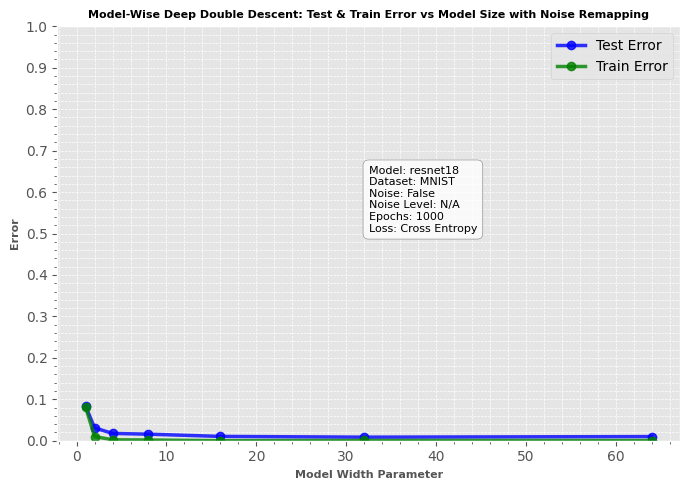

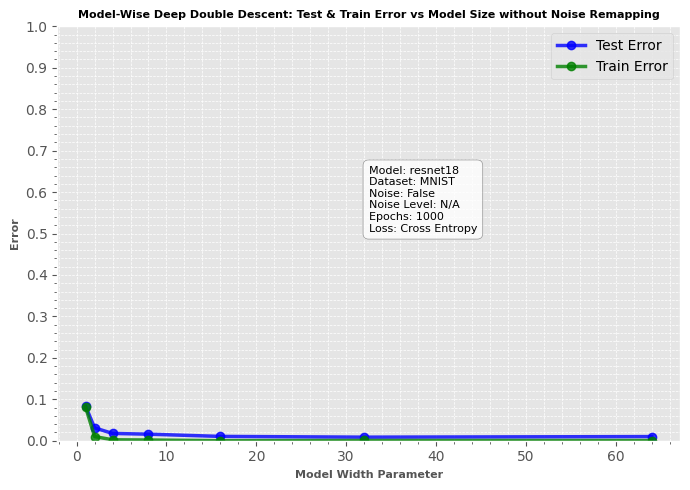

Controlling with noise.. resnet18 MNIST False 0.3 4000
Processing Model: resnet18, Dataset: MNIST, Noise: False, Noise Level: 0.3, Epochs: 4000


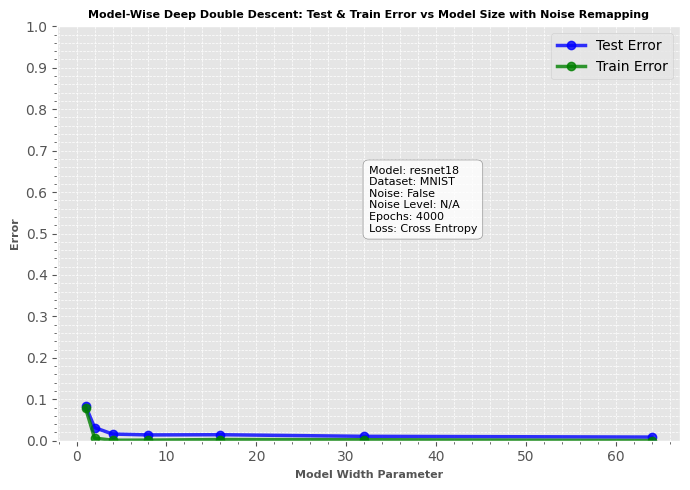

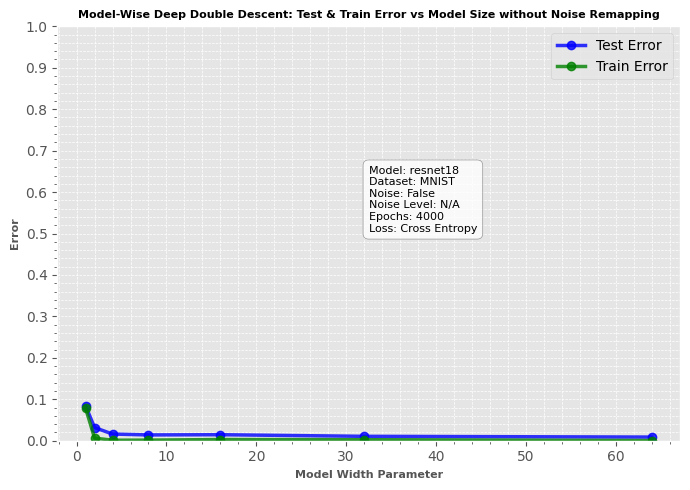

Controlling with noise.. resnet18 MNIST False 0.4 1000
Processing Model: resnet18, Dataset: MNIST, Noise: False, Noise Level: 0.4, Epochs: 1000


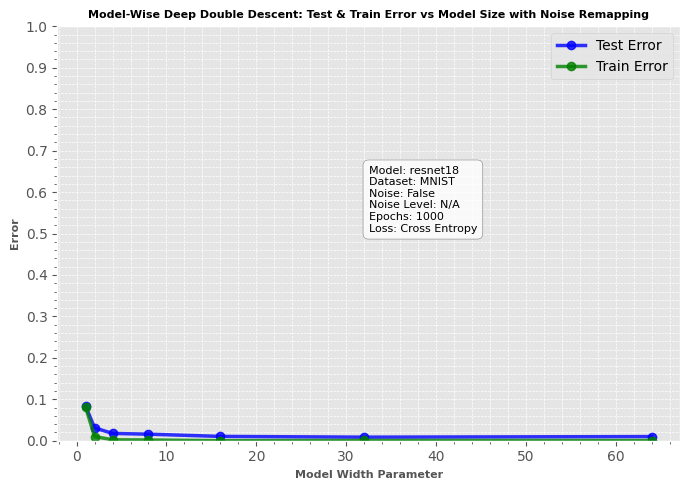

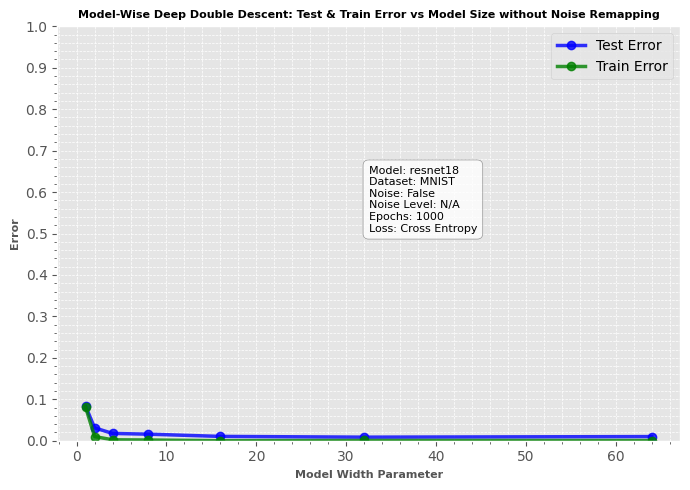

Controlling with noise.. resnet18 MNIST False 0.4 4000
Processing Model: resnet18, Dataset: MNIST, Noise: False, Noise Level: 0.4, Epochs: 4000


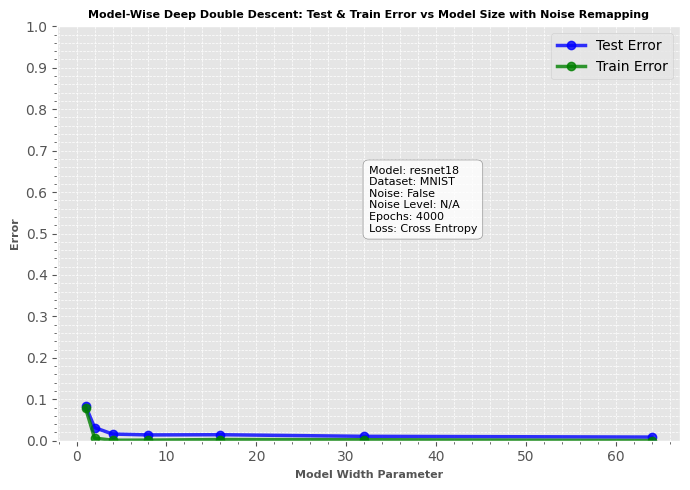

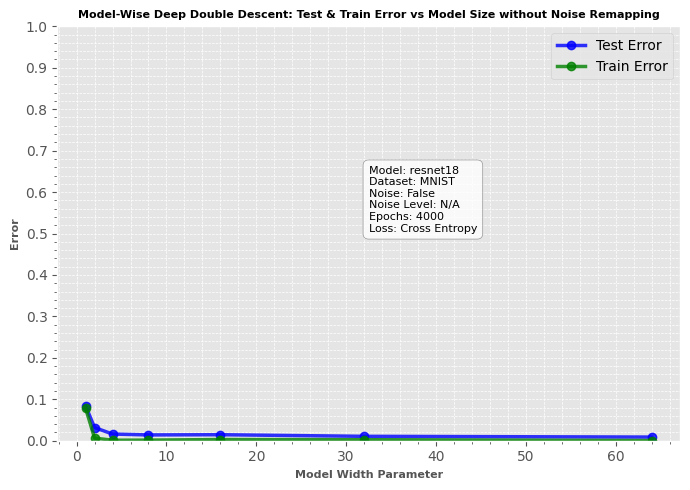

Controlling with noise.. resnet18 MNIST False 0.2 1000
Processing Model: resnet18, Dataset: MNIST, Noise: False, Noise Level: 0.2, Epochs: 1000


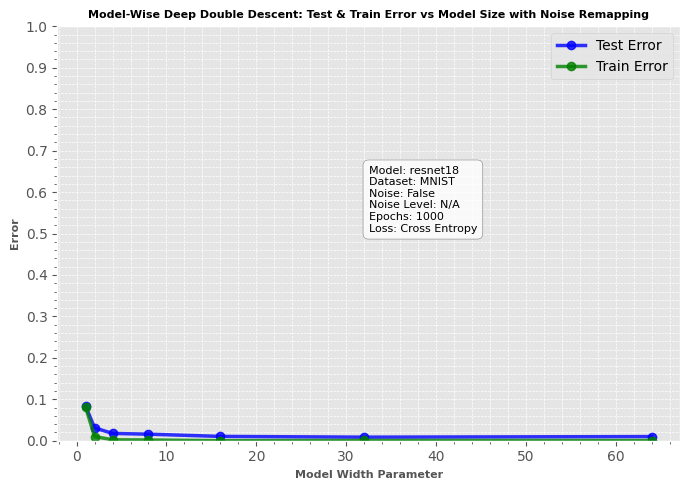

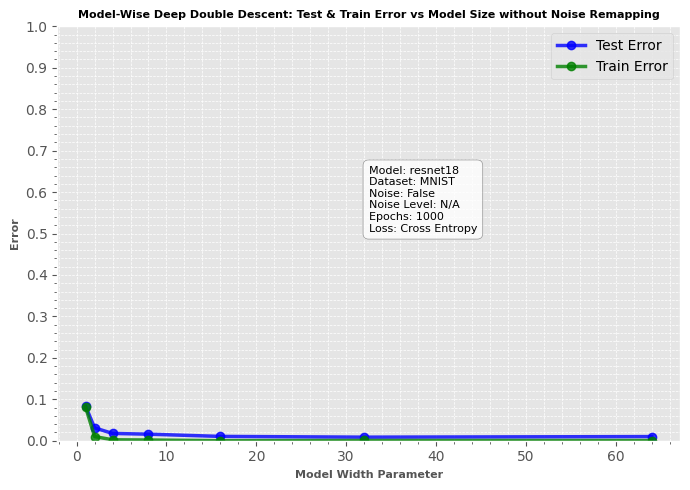

Controlling with noise.. resnet18 MNIST False 0.2 4000
Processing Model: resnet18, Dataset: MNIST, Noise: False, Noise Level: 0.2, Epochs: 4000


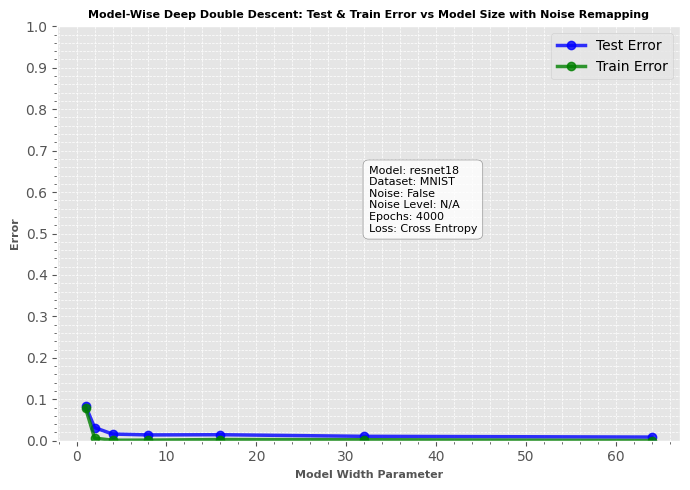

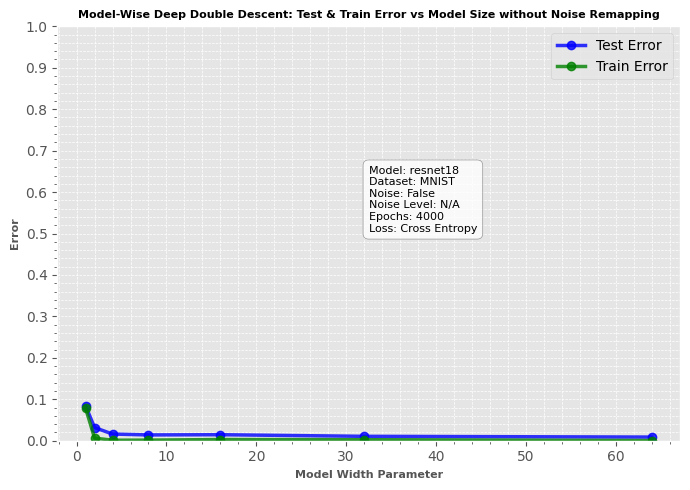

Controlling with noise.. resnet18 MNIST False 0.0 1000
Processing Model: resnet18, Dataset: MNIST, Noise: False, Noise Level: 0.0, Epochs: 1000


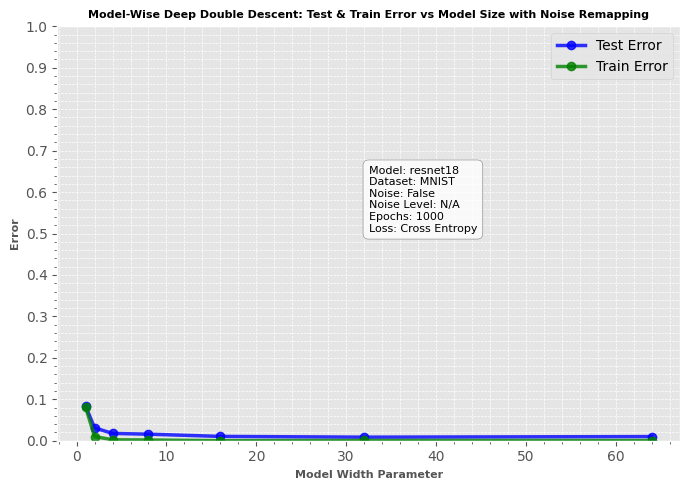

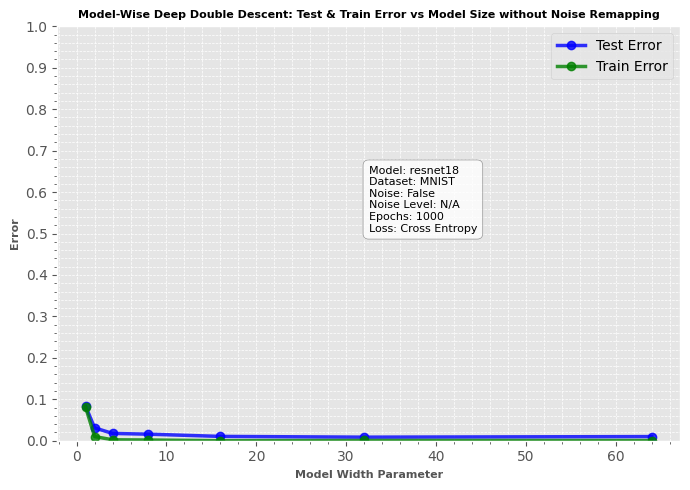

Controlling with noise.. resnet18 MNIST False 0.0 4000
Processing Model: resnet18, Dataset: MNIST, Noise: False, Noise Level: 0.0, Epochs: 4000


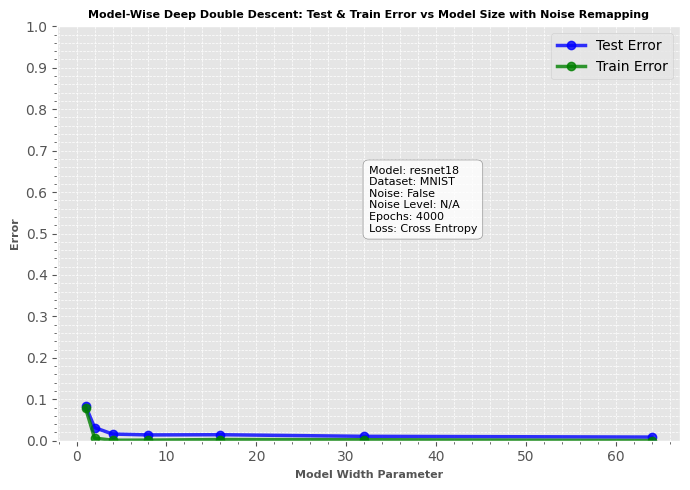

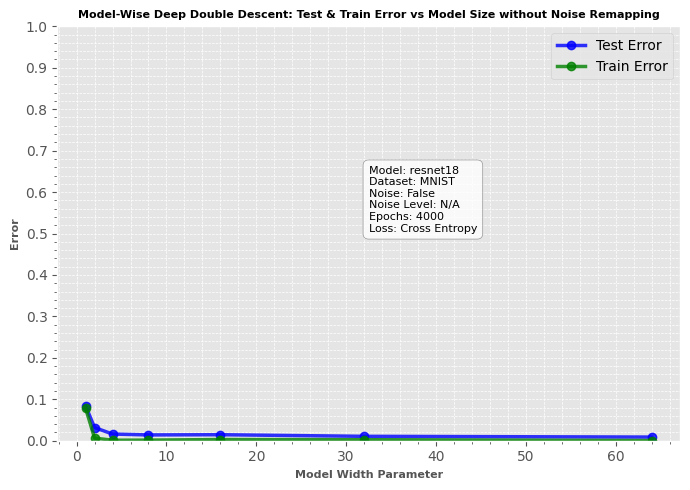

Controlling with noise.. resnet18 MNIST True 0.3 1000
Controlling with noise.. resnet18 MNIST True 0.3 4000
Controlling with noise.. resnet18 MNIST True 0.4 1000
Processing Model: resnet18, Dataset: MNIST, Noise: True, Noise Level: 0.4, Epochs: 1000


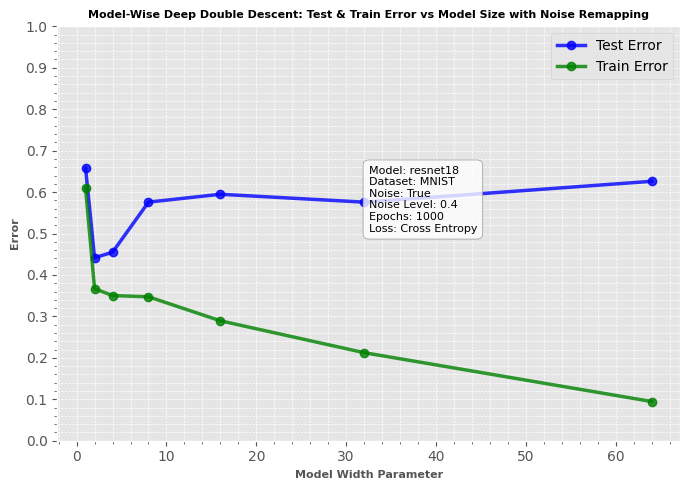

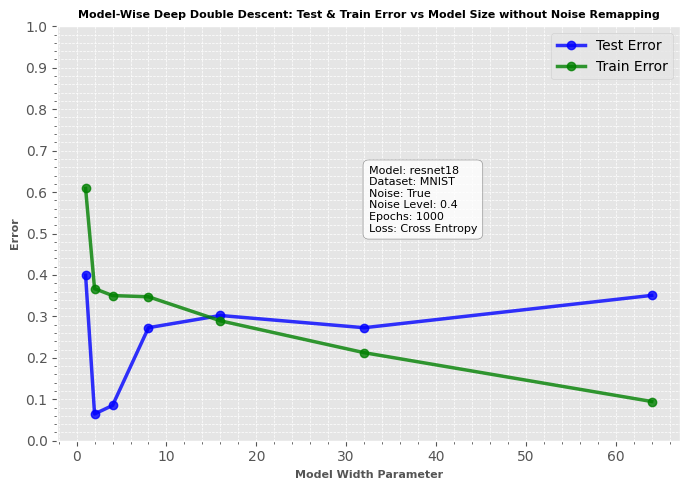

Controlling with noise.. resnet18 MNIST True 0.4 4000
Processing Model: resnet18, Dataset: MNIST, Noise: True, Noise Level: 0.4, Epochs: 4000


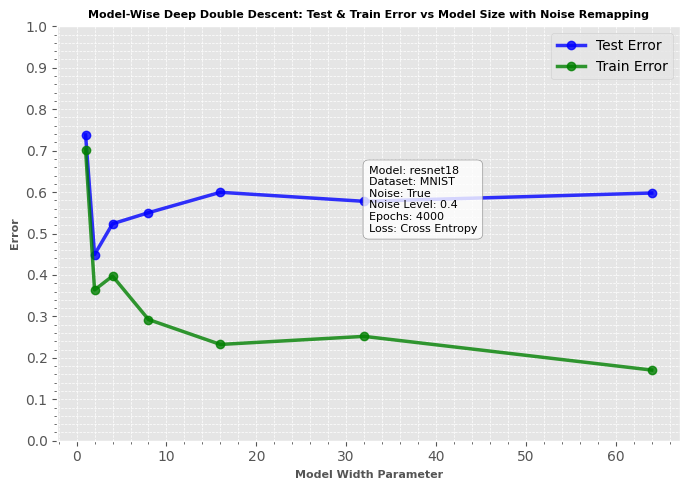

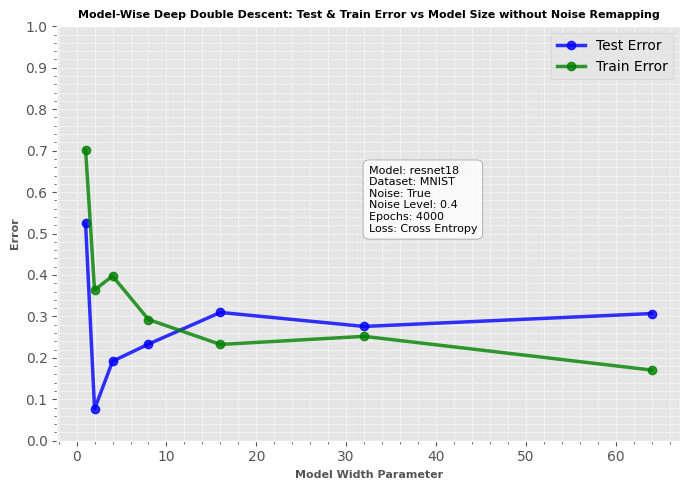

Controlling with noise.. resnet18 MNIST True 0.2 1000
Processing Model: resnet18, Dataset: MNIST, Noise: True, Noise Level: 0.2, Epochs: 1000


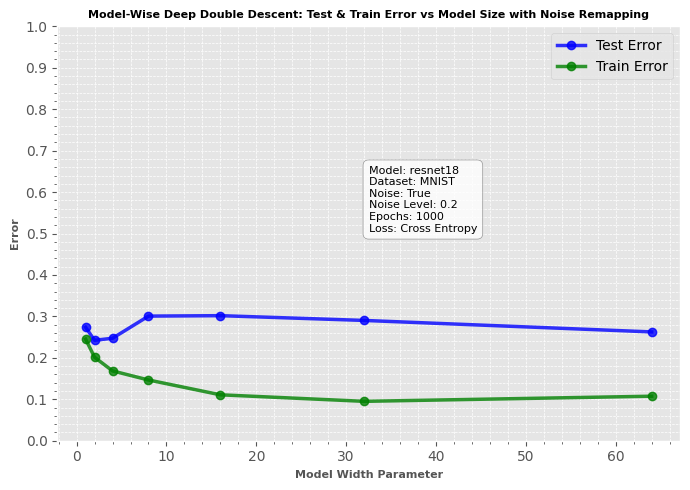

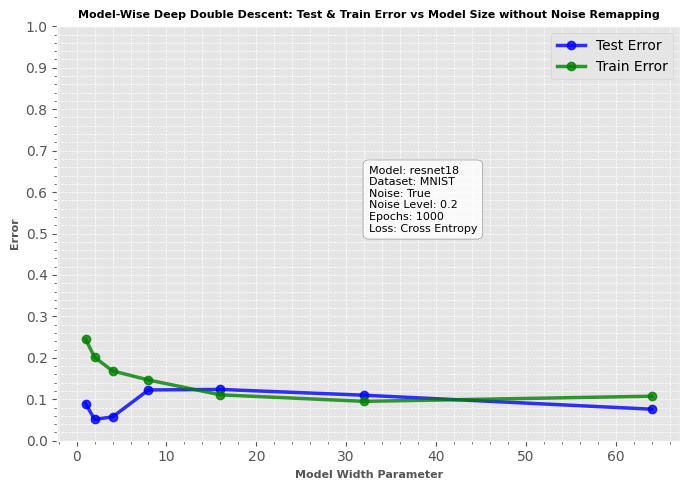

Controlling with noise.. resnet18 MNIST True 0.2 4000
Processing Model: resnet18, Dataset: MNIST, Noise: True, Noise Level: 0.2, Epochs: 4000


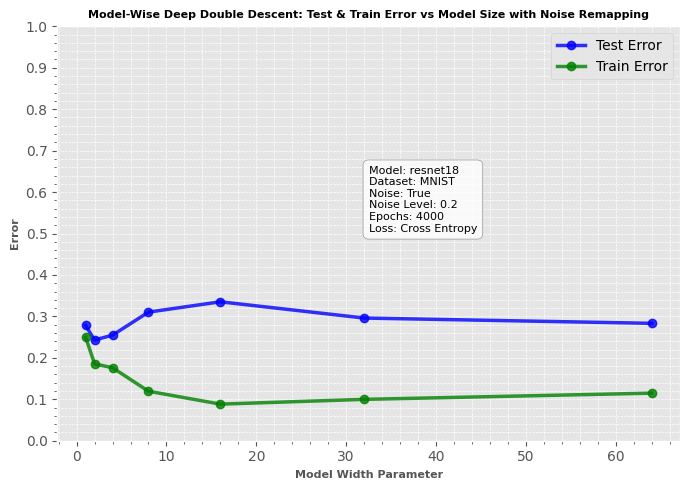

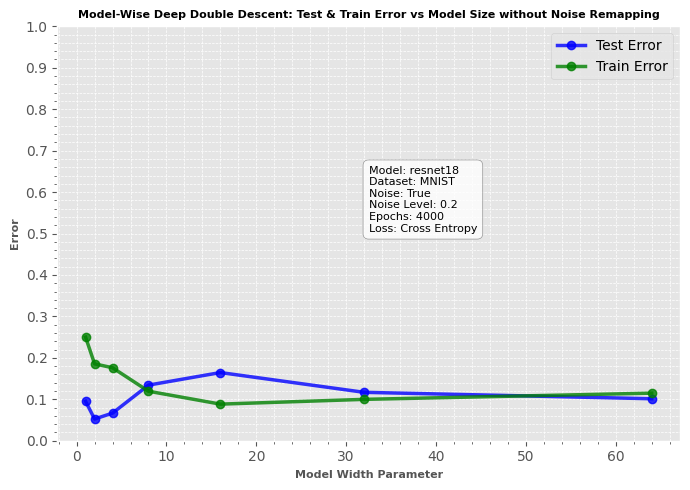

Controlling with noise.. resnet18 MNIST True 0.0 1000
Controlling with noise.. resnet18 MNIST True 0.0 4000
Controlling with noise.. resnet18 MNIST None 0.3 1000
Controlling with noise.. resnet18 MNIST None 0.3 4000
Controlling with noise.. resnet18 MNIST None 0.4 1000
Controlling with noise.. resnet18 MNIST None 0.4 4000
Controlling with noise.. resnet18 MNIST None 0.2 1000
Controlling with noise.. resnet18 MNIST None 0.2 4000
Controlling with noise.. resnet18 MNIST None 0.0 1000
Controlling with noise.. resnet18 MNIST None 0.0 4000


In [ ]:
def filter_configs(chosen_model, chosen_dataset, chosen_noise, chosen_noise_level, chosen_epochs):
    filtered_configs = {}
    for exp_name, exp_data in experiments.items():
        for exp_id, cfg in exp_data.items():
            matches = (cfg.get('model.name') == chosen_model and
                       cfg.get('data.name') == chosen_dataset and
                       str(cfg.get('data.noise')) == str(chosen_noise) and
                       cfg.get('model.trainer_params.max_epochs') == chosen_epochs)

            if chosen_noise:
                matches = matches and (cfg.get('data.noise_level') == chosen_noise_level)

            if matches:
                if exp_name not in filtered_configs:
                    filtered_configs[exp_name] = {}
                filtered_configs[exp_name][exp_id] = cfg
    print("Controlling with noise..", chosen_model, chosen_dataset, chosen_noise, chosen_noise_level, chosen_epochs)
    return filtered_configs

## CHANGE TO USE IT FOR OCTOBER_10 EXPERIMENTS
def filter_configs_without_noise_boolean(chosen_model, chosen_dataset, chosen_noise_level, chosen_epochs):
    filtered_configs = {}
    for exp_name, exp_data in experiments.items():
        for exp_id, cfg in exp_data.items():
            matches = (cfg.get('model.name') == chosen_model and
                       cfg.get('data.name') == chosen_dataset and
                       cfg.get('model.trainer_params.max_epochs') == chosen_epochs)

            matches = matches and (cfg.get('data.noise_level') == chosen_noise_level)

            if matches:
                if exp_name not in filtered_configs:
                    filtered_configs[exp_name] = {}
                filtered_configs[exp_name][exp_id] = cfg
    print("Controlling without noise..", chosen_model, chosen_dataset, chosen_noise_level, chosen_epochs)
    return filtered_configs

# Extracting unique configurations
available_models = set()
available_datasets = set()
available_noise = set()
available_noise_levels = set()
available_epochs = set()

for exp_name, exp_data in experiments.items():
    for exp_id, cfg in exp_data.items():
        available_models.add(cfg.get('model.name'))
        available_datasets.add(cfg.get('data.name'))
        available_noise.add(cfg.get('data.noise'))
        available_noise_levels.add(cfg.get('data.noise_level'))
        available_epochs.add(cfg.get('model.trainer_params.max_epochs'))

# Loop through all the possible combinations for MNIST
for chosen_model in available_models:
    for chosen_dataset in ["MNIST"]:
        for chosen_noise in available_noise:
          for chosen_noise_level in available_noise_levels:
            for chosen_epochs in available_epochs:
                        filtered_configs = filter_configs(chosen_model, chosen_dataset, chosen_noise, chosen_noise_level, chosen_epochs)
                        if filtered_configs:
                            print(f"Processing Model: {chosen_model}, Dataset: {chosen_dataset}, Noise: {chosen_noise}, Noise Level: {chosen_noise_level}, Epochs: {chosen_epochs}")
                            plot_deep_double_descent(experiments_logs, filtered_configs, img_folder, chosen_model, chosen_dataset, str(chosen_noise), chosen_noise_level, chosen_epochs)
                            plot_deep_double_descent_without_remapping(experiments_logs, filtered_configs, img_folder, chosen_model, chosen_dataset, str(chosen_noise), chosen_noise_level, chosen_epochs)


WITH CIFAR

In [ ]:
## CHANGE TO USE IT FOR OCTOBER_10 EXPERIMENTS
def filter_configs_without_noise_boolean(chosen_model, chosen_dataset, chosen_noise_level, chosen_epochs):
    filtered_configs = {}
    for exp_name, exp_data in experiments.items():
        for exp_id, cfg in exp_data.items():
            matches = (cfg.get('model.name') == chosen_model and
                       cfg.get('data.name') == chosen_dataset and
                       cfg.get('model.trainer_params.max_epochs') == chosen_epochs)

            matches = matches and (cfg.get('data.noise_level') == chosen_noise_level)

            if matches:
                if exp_name not in filtered_configs:
                    filtered_configs[exp_name] = {}
                filtered_configs[exp_name][exp_id] = cfg
    print("Controlling without noise..", chosen_model, chosen_dataset, chosen_noise_level, chosen_epochs)
    return filtered_configs

# Extracting unique configurations
available_models = set()
available_datasets = set()
available_noise = set()
available_noise_levels = set()
available_epochs = set()

for exp_name, exp_data in experiments.items():
    for exp_id, cfg in exp_data.items():
        available_models.add(cfg.get('model.name'))
        available_datasets.add(cfg.get('data.name'))
        available_noise.add(cfg.get('data.noise'))
        available_noise_levels.add(cfg.get('data.noise_level'))
        available_epochs.add(cfg.get('model.trainer_params.max_epochs'))

# Loop through all the possible combinations for MNIST
for chosen_model in available_models:
    for chosen_dataset in ["CIFAR10","CIFAR100"]:
        #for chosen_noise in [available_noise]:
          for chosen_noise_level in [0.0]:
            for chosen_epochs in available_epochs:
                        filtered_configs = filter_configs_without_noise_boolean(chosen_model, chosen_dataset, chosen_noise_level, chosen_epochs)
                        if filtered_configs:
                            print(f"Processing Model: {chosen_model}, Dataset: {chosen_dataset}, Noise Level: {chosen_noise_level}, Epochs: {chosen_epochs}")
                            plot_deep_double_descent(experiments_logs, filtered_configs, img_folder, chosen_model, chosen_dataset, chosen_noise_level, chosen_epochs)
                            plot_deep_double_descent_without_remapping(experiments_logs, filtered_configs, img_folder, chosen_model, chosen_dataset, chosen_noise_level, chosen_epochs)




FINAL ONE

# CON OCTOBER 10



Controlling without noise.. resnet18 CIFAR100 0.0 4000
Processing Model: resnet18, Dataset: CIFAR100, Noise Level: 0.0, Epochs: 4000


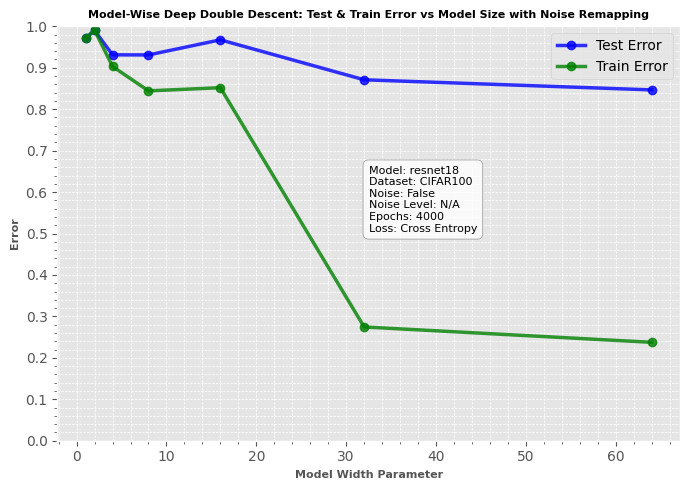

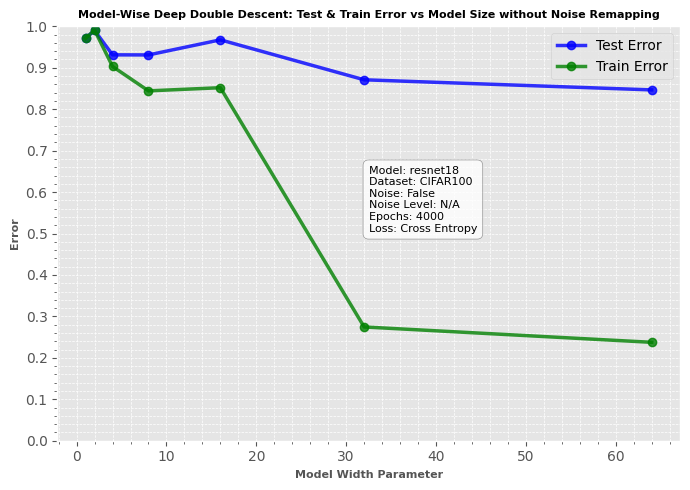

Controlling without noise.. resnet18 CIFAR100 0.2 4000
Processing Model: resnet18, Dataset: CIFAR100, Noise Level: 0.2, Epochs: 4000


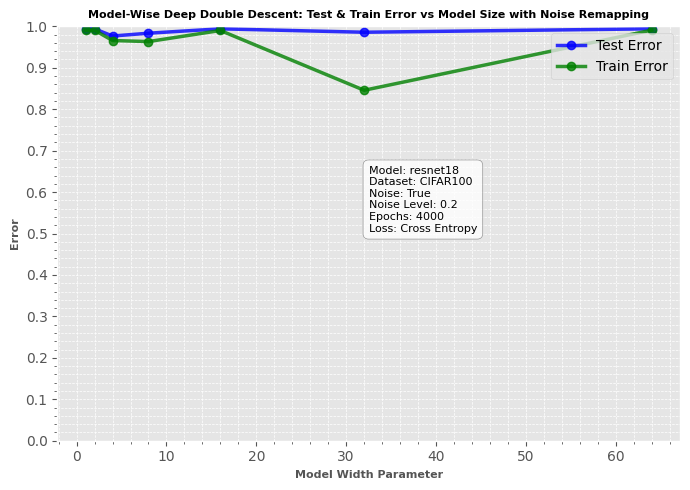

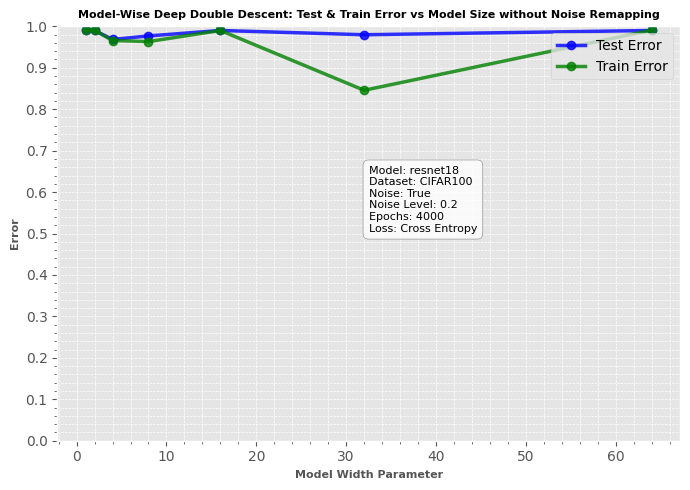

Controlling without noise.. resnet18 CIFAR10 0.0 4000
Processing Model: resnet18, Dataset: CIFAR10, Noise Level: 0.0, Epochs: 4000


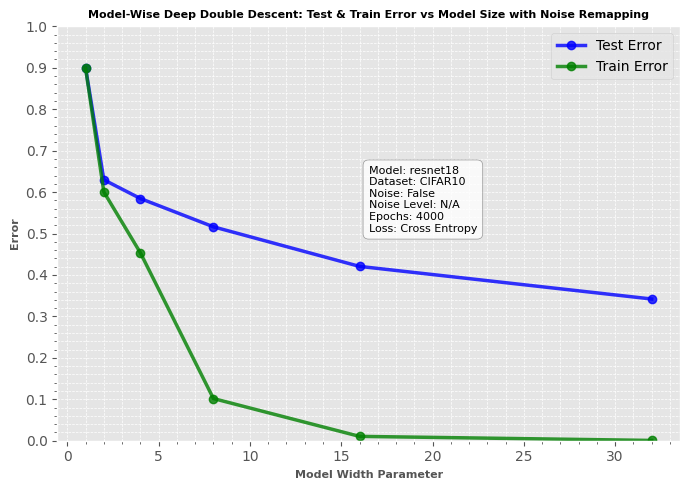

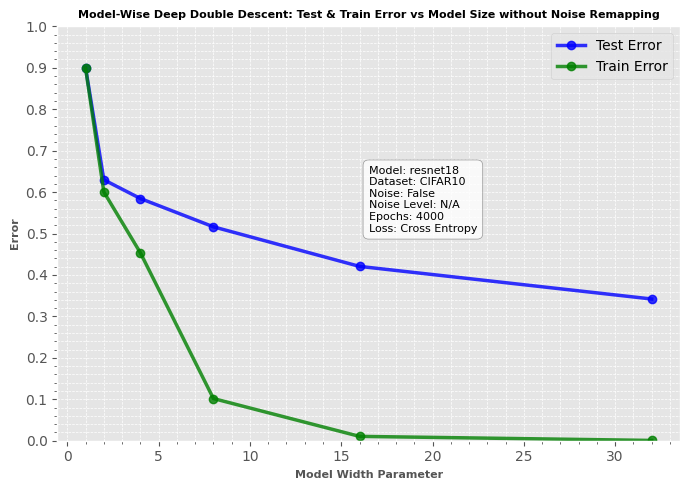

Controlling without noise.. resnet18 CIFAR10 0.2 4000
Processing Model: resnet18, Dataset: CIFAR10, Noise Level: 0.2, Epochs: 4000


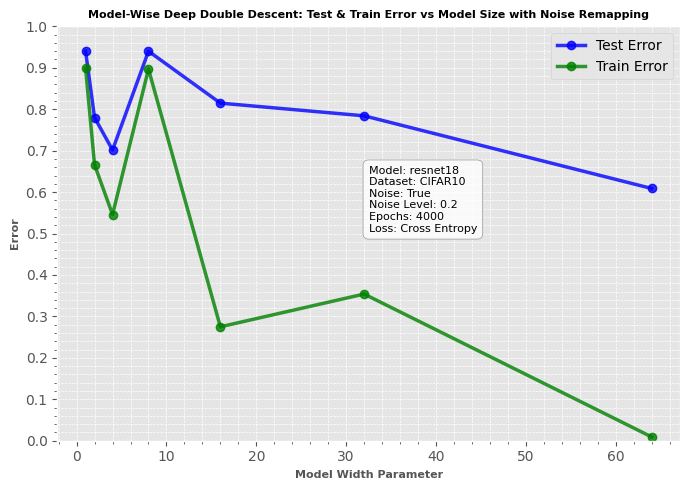

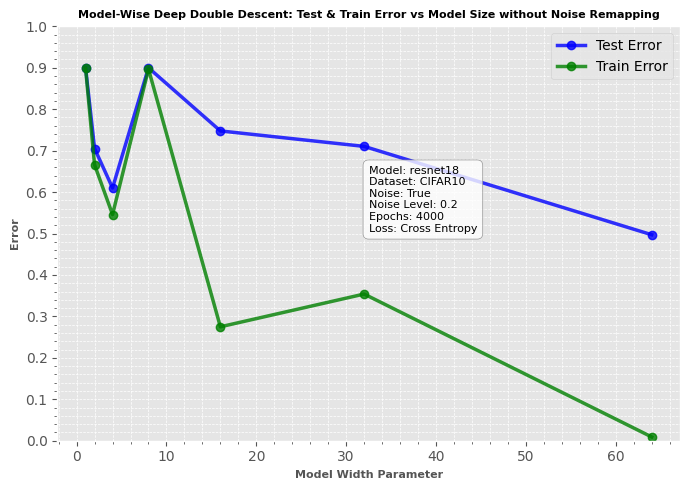

In [42]:
## CHANGE TO USE IT FOR OCTOBER_10 EXPERIMENTS
def filter_configs_without_noise_boolean(chosen_model, chosen_dataset, chosen_noise_level, chosen_epochs):
    filtered_configs = {}
    for exp_name, exp_data in experiments.items():
        for exp_id, cfg in exp_data.items():
            matches = (cfg.get('model.name') == chosen_model and
                       cfg.get('data.name') == chosen_dataset and
                       cfg.get('model.trainer_params.max_epochs') == chosen_epochs)

            matches = matches and (cfg.get('data.noise_level') == chosen_noise_level)

            if matches:
                if exp_name not in filtered_configs:
                    filtered_configs[exp_name] = {}
                filtered_configs[exp_name][exp_id] = cfg
    print("Controlling without noise..", chosen_model, chosen_dataset, chosen_noise_level, chosen_epochs)
    return filtered_configs

# Extracting unique configurations
available_models = set()
available_datasets = set()
available_noise = set()
available_noise_levels = set()
available_epochs = set()

for exp_name, exp_data in experiments.items():
    for exp_id, cfg in exp_data.items():
        available_models.add(cfg.get('model.name'))
        available_datasets.add(cfg.get('data.name'))
        available_noise.add(cfg.get('data.noise'))
        available_noise_levels.add(cfg.get('data.noise_level'))
        available_epochs.add(cfg.get('model.trainer_params.max_epochs'))

# Loop through all the possible combinations for MNIST
for chosen_model in available_models:
    for chosen_dataset in available_datasets:
          for chosen_noise_level in available_noise_levels:
            for chosen_epochs in available_epochs:
                        filtered_configs = filter_configs_without_noise_boolean(chosen_model, chosen_dataset, chosen_noise_level, chosen_epochs)
                        if filtered_configs:
                            print(f"Processing Model: {chosen_model}, Dataset: {chosen_dataset}, Noise Level: {chosen_noise_level}, Epochs: {chosen_epochs}")
                            plot_deep_double_descent(experiments_logs, filtered_configs, img_folder, chosen_model, chosen_dataset, chosen_noise_level, chosen_epochs)
                            plot_deep_double_descent_without_remapping(experiments_logs, filtered_configs, img_folder, chosen_model, chosen_dataset, chosen_noise_level, chosen_epochs)




## Refining experiment logs for Epoch-Wise DDD

The provided script restructures the experiment logs to facilitate epoch-wise analysis.

**Highlights**:
- Replaces dataloader indices with understandable names, `val` and `test`.
- Averages out metrics across epochs.
- Removes redundant step-wise metrics and renames epoch-wise columns for better clarity.
- Combines similar metric columns where possible.


## **FINALLL (SOLO THIS, IL RESTO UGUALE PER TUTTI -- MNIST SOTTO) **

In [43]:
# Step 1: Filtering configurations with num_parameters=64

WIDTH_PARAMETERS = [1, 2, 4, 8, 16, 32, 64]  # Specifying multiple width parameters to loop over
combinations = []

for width in WIDTH_PARAMETERS:  # Looping over each width parameter
  for exp_name, exp_data in experiments.items():
      for exp_id, cfg in exp_data.items():
          if cfg.get('model.num_parameters') == width:  #CHANGE IT FOR OTHER SIZES!!!!!
              combinations.append({
                  'id':exp_id,
                  'model': cfg.get('model.name'),
                  'dataset': cfg.get('data.name'),
                  'noise': cfg.get('data.noise_level') > 0.0,
                  'noise_level': cfg.get('data.noise_level') if cfg.get('data.noise_level') > 0.0 else None,
                  'epochs': cfg.get('model.trainer_params.max_epochs'),
                  'width_parameter': cfg.get('model.num_parameters'),
                  'out_features': cfg.get('model.out_features'),
              })

print(combinations)
print(len(combinations))

[{'id': 'Q7lu2Ihme4kQirop', 'model': 'resnet18', 'dataset': 'CIFAR100', 'noise': False, 'noise_level': None, 'epochs': 4000, 'width_parameter': 1, 'out_features': 100}, {'id': 'M2kvzGrce73aWczw', 'model': 'resnet18', 'dataset': 'CIFAR10', 'noise': False, 'noise_level': None, 'epochs': 4000, 'width_parameter': 1, 'out_features': 10}, {'id': 'ZWO62B96szKLeUP2', 'model': 'resnet18', 'dataset': 'CIFAR10', 'noise': True, 'noise_level': 0.2, 'epochs': 4000, 'width_parameter': 1, 'out_features': 10}, {'id': 'e6lD40ZJ069Mi9WM', 'model': 'resnet18', 'dataset': 'CIFAR100', 'noise': True, 'noise_level': 0.2, 'epochs': 4000, 'width_parameter': 1, 'out_features': 100}, {'id': 'bguy2bUzzutUDkSY', 'model': 'resnet18', 'dataset': 'CIFAR100', 'noise': False, 'noise_level': None, 'epochs': 4000, 'width_parameter': 2, 'out_features': 100}, {'id': 'u8G3GBNjkuQIP6Zt', 'model': 'resnet18', 'dataset': 'CIFAR100', 'noise': True, 'noise_level': 0.2, 'epochs': 4000, 'width_parameter': 2, 'out_features': 100}, {

## **MNISTT**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 1: Filtering configurations with num_parameters=64

WIDTH_PARAMETERS = [1, 2, 4, 8, 16, 32, 64]  # Specifying multiple width parameters to loop over
combinations = []

for width in WIDTH_PARAMETERS:  # Looping over each width parameter
    for exp_name, exp_data in experiments.items():
        for exp_id, cfg in exp_data.items():
            # Check for model.num_parameters, dataset name and noise level
            if (cfg.get('model.num_parameters') == width and
                    (cfg.get('data.name') not in ['CIFAR10', 'CIFAR100'] or
                     (cfg.get('data.name') in ['CIFAR10', 'CIFAR100'] and cfg.get('data.noise_level') == 0.0))):
                combinations.append({
                    'id': exp_id,
                    'model': cfg.get('model.name'),
                    'dataset': cfg.get('data.name'),
                    'noise': cfg.get('data.noise'),
                    'noise_level': cfg.get('data.noise_level') if cfg.get('data.noise') else None,
                    'epochs': cfg.get('model.trainer_params.max_epochs'),
                    'width_parameter': cfg.get('model.num_parameters'),
                    'out_features': cfg.get('model.out_features'),
                })

print(combinations)
print(len(combinations))

[{'id': '48KVLvbCCLLqei51', 'model': 'resnet18', 'dataset': 'MNIST', 'noise': False, 'noise_level': None, 'epochs': 1000, 'width_parameter': 1, 'out_features': 10}, {'id': 'FFpt1NoNUovO29KE', 'model': 'resnet18', 'dataset': 'MNIST', 'noise': True, 'noise_level': 0.2, 'epochs': 1000, 'width_parameter': 1, 'out_features': 10}, {'id': 'M04ZNM56r1pfv9vv', 'model': 'resnet18', 'dataset': 'MNIST', 'noise': True, 'noise_level': 0.4, 'epochs': 1000, 'width_parameter': 1, 'out_features': 10}, {'id': 'IFbRn3jwKmOrewgF', 'model': 'resnet18', 'dataset': 'MNIST', 'noise': False, 'noise_level': None, 'epochs': 4000, 'width_parameter': 1, 'out_features': 10}, {'id': 'aYF9CL4zw8xiYBHj', 'model': 'resnet18', 'dataset': 'MNIST', 'noise': True, 'noise_level': 0.2, 'epochs': 4000, 'width_parameter': 1, 'out_features': 10}, {'id': 'KLosnB3pUaQhsZsu', 'model': 'resnet18', 'dataset': 'MNIST', 'noise': True, 'noise_level': 0.4, 'epochs': 4000, 'width_parameter': 1, 'out_features': 10}, {'id': 'paeM6nlt1qiiUZb

In [44]:
# Step 2: Transformation of Logs for each configuration

convert_dataloaders = {0: "val", 1: "test"}
epoch_wise_logs = {}

for combo in combinations:
    for exp_name, exp_dict in experiments_logs.items():
        for exp_id, cfg in exp_dict.items():
            if exp_id == combo['id']:
                # Average metrics over the epochs
                exp_logs = exp_dict[exp_id].groupby("epoch").mean()
                #print(exp_id, exp_logs.keys(), exp_logs)

                # Transformation logic here
                for column in list(exp_logs.columns):
                    # Removing columns related to steps, epochs, dataloader_idx_0, and loss
                    if "step" in column or "dataloader_idx_0" in column or "loss" in column or "test_SoftLabelsAccuracy" in column:
                        exp_logs.drop(column, axis=1, inplace=True)
                    elif "epoch" in column:
                        new_column_name = column.replace("_epoch", "")
                        exp_logs.rename(columns={column: new_column_name}, inplace=True)

                for column in list(exp_logs.columns):
                    for idx, name in convert_dataloaders.items():
                        if f"dataloader_idx_{idx}" in column:
                            new_column_name = column.replace(f"dataloader_idx_{idx}", name)
                            if new_column_name in exp_logs.columns:
                                mask = exp_logs[column].isna() & exp_logs[new_column_name].isna()
                                if not mask.all():
                                    exp_logs[new_column_name].fillna(exp_logs[column], inplace=True)
                                    exp_logs.drop(column, axis=1, inplace=True)
                            else:
                                exp_logs.rename(columns={column: new_column_name}, inplace=True)

                # Update the processed logs back into the main dictionary
                epoch_wise_logs[exp_id] = exp_logs



for combo in combinations:
  for exp_id, cfg in exp_dict.items():
     if exp_id == combo['id']:
        print(epoch_wise_logs[exp_id])


       val_SoftLabelsAccuracy/test  train_SoftLabelsAccuracy
epoch                                                       
0                           0.0183                  0.013325
1                           0.0201                  0.022475
2                           0.0273                  0.026500
3                           0.0268                  0.025750
4                           0.0275                  0.026650
...                            ...                       ...
3996                        0.0285                  0.028825
3997                        0.0284                  0.029125
3998                        0.0285                  0.028975
3999                        0.0287                  0.028775
4000                           NaN                       NaN

[4001 rows x 2 columns]
       val_SoftLabelsAccuracy/test  train_SoftLabelsAccuracy
epoch                                                       
0                              0.1                  0.101200

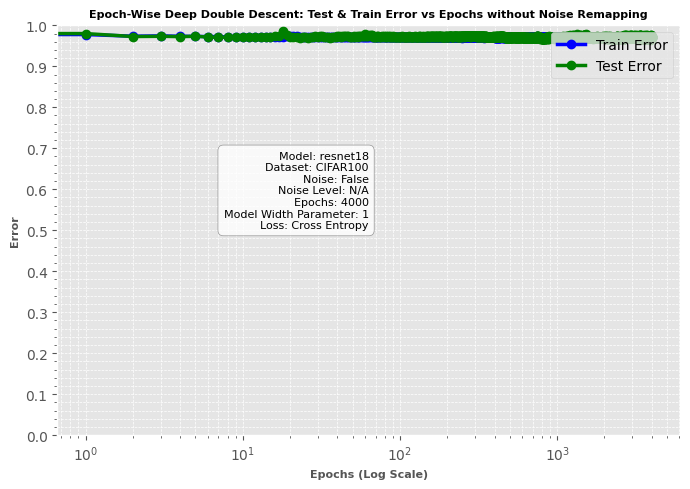

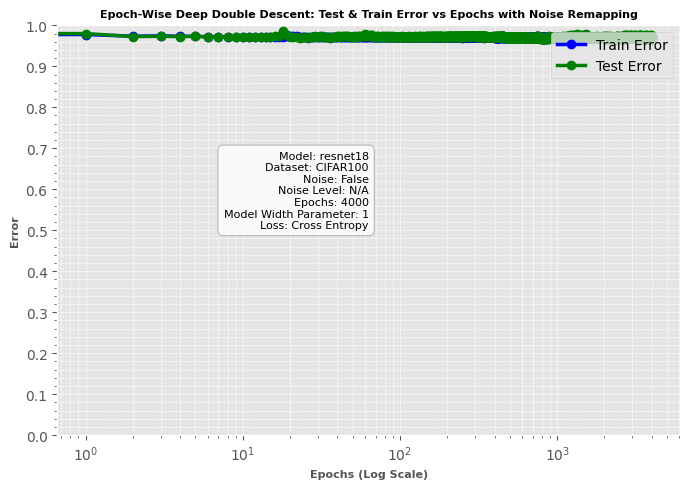

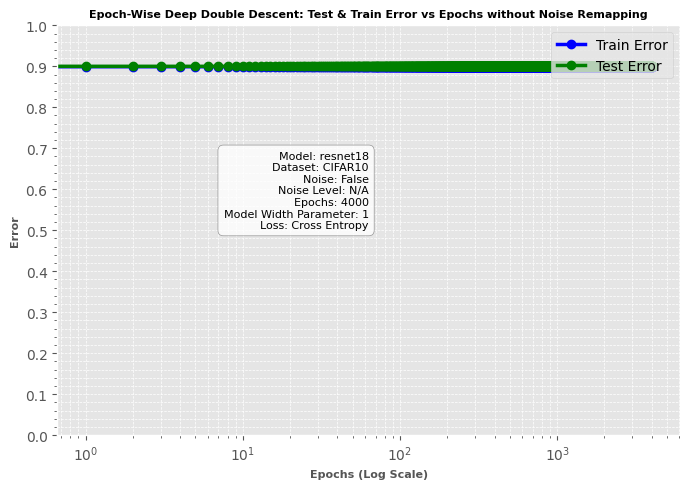

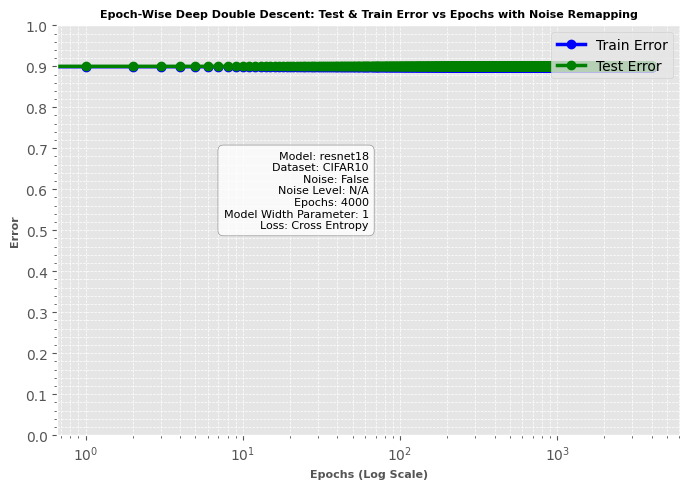

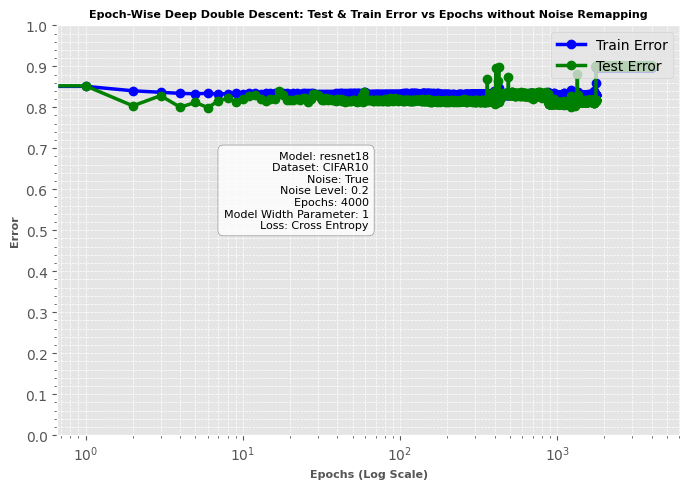

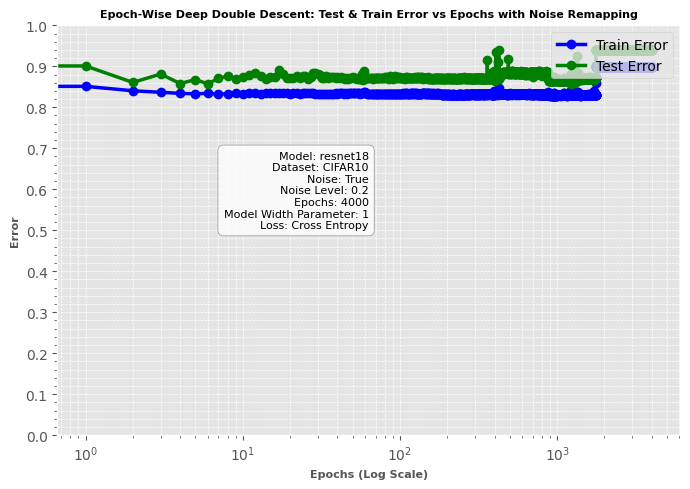

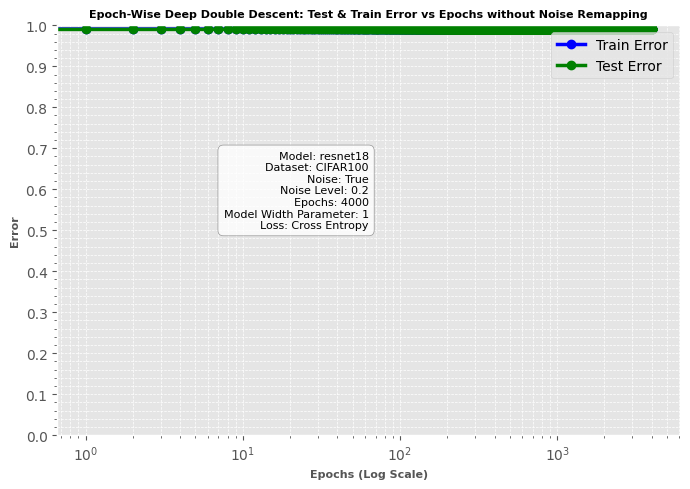

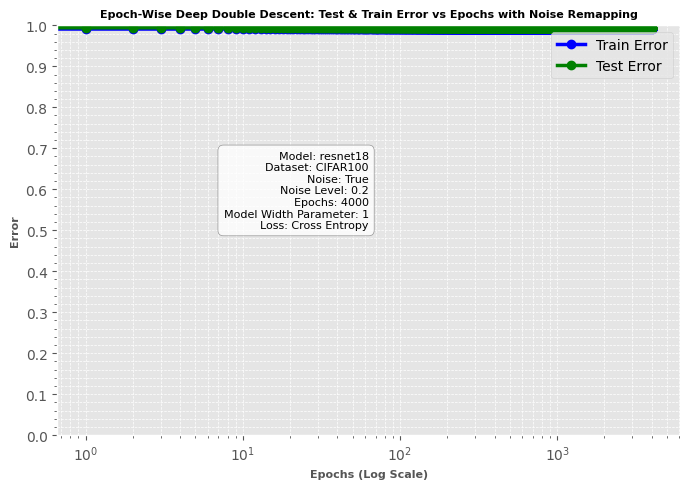

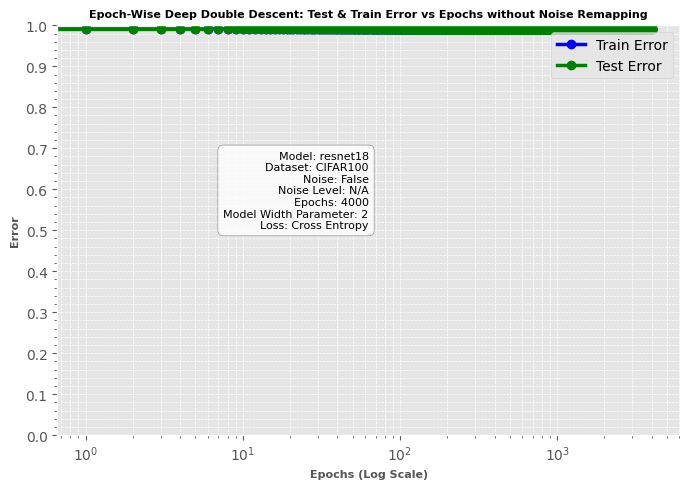

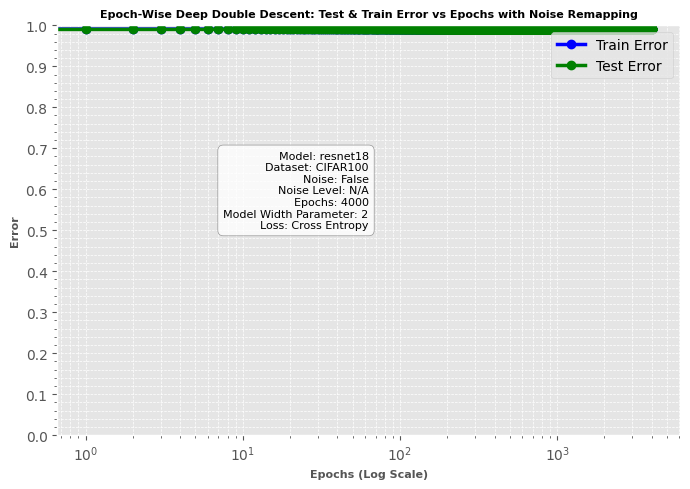

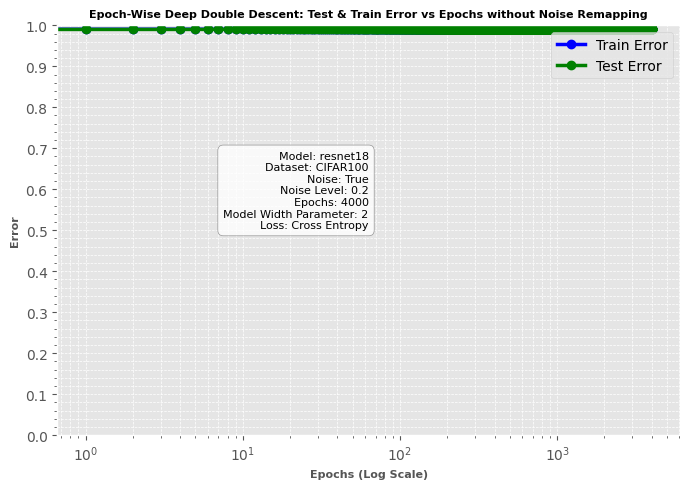

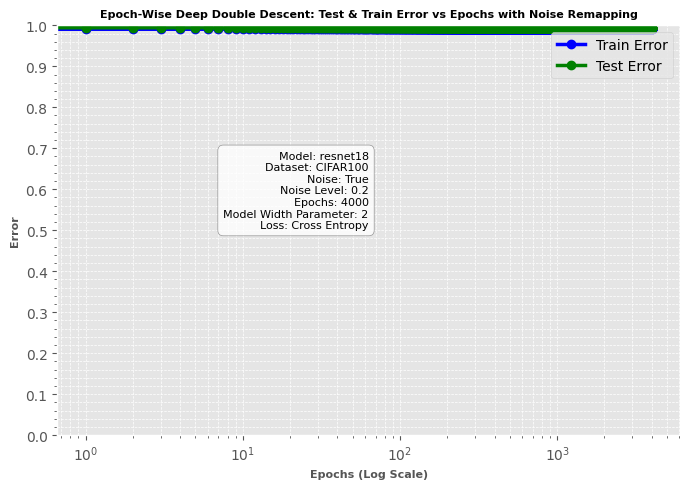

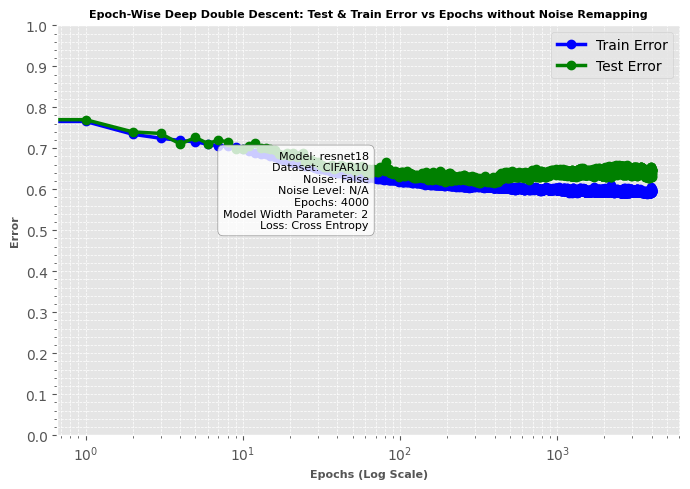

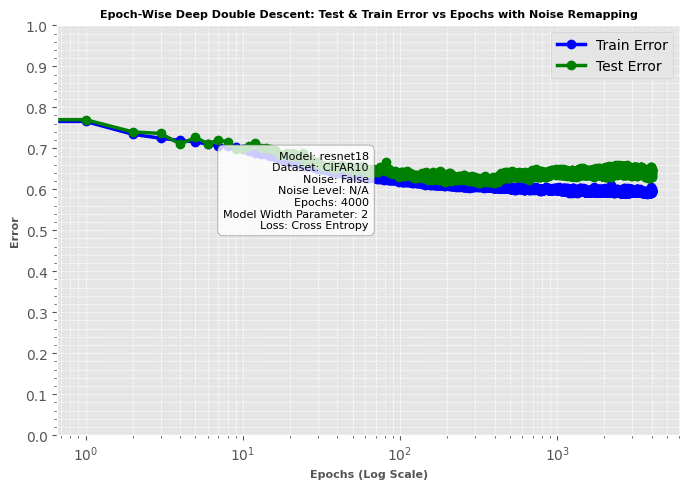

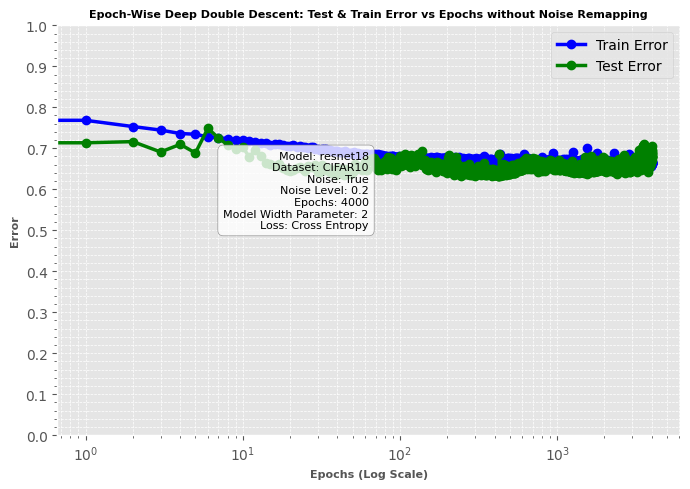

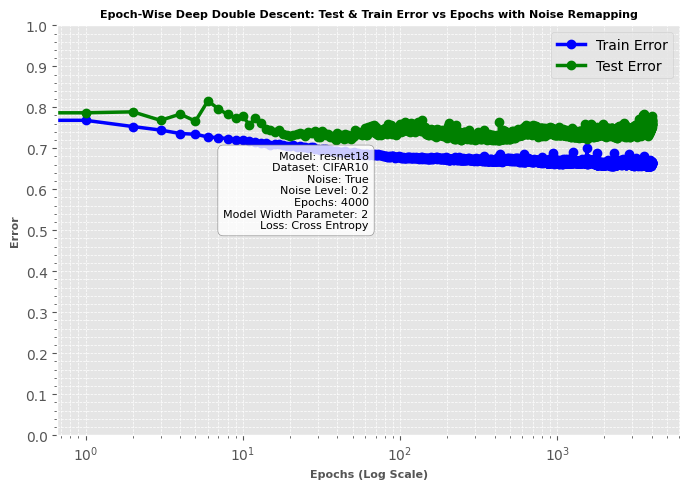

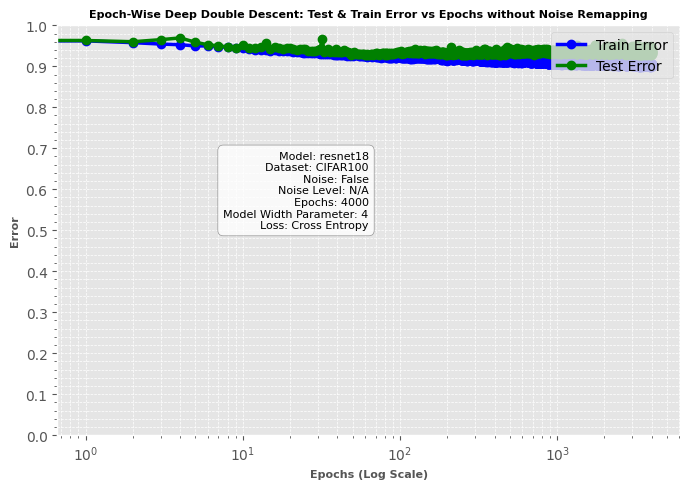

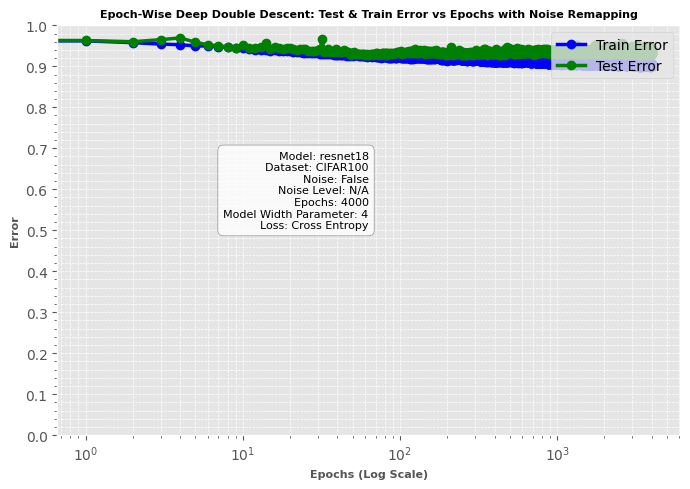

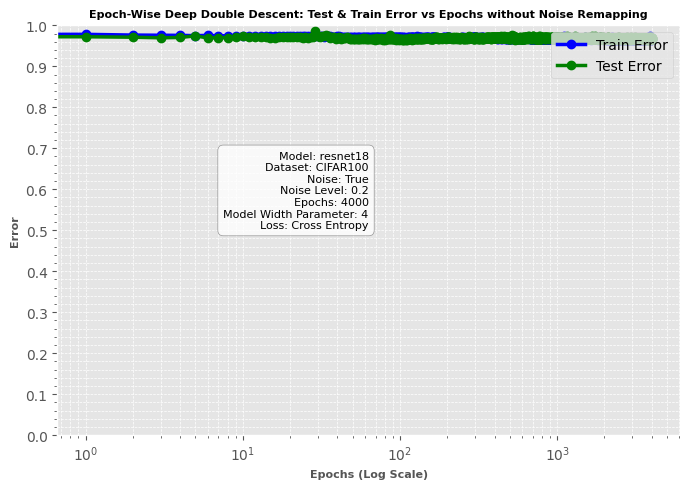

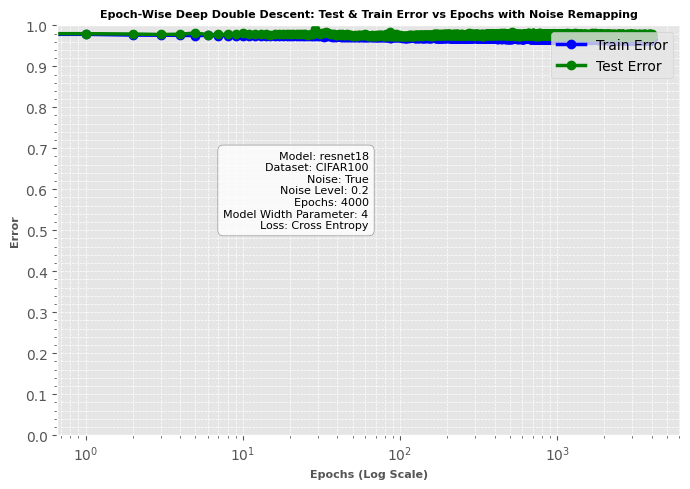

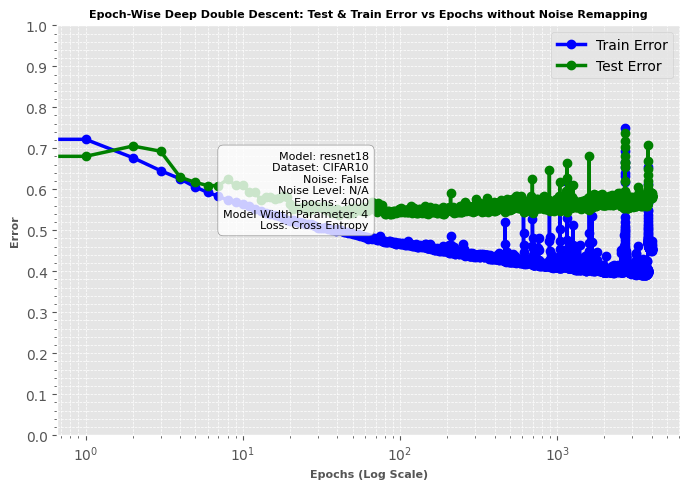

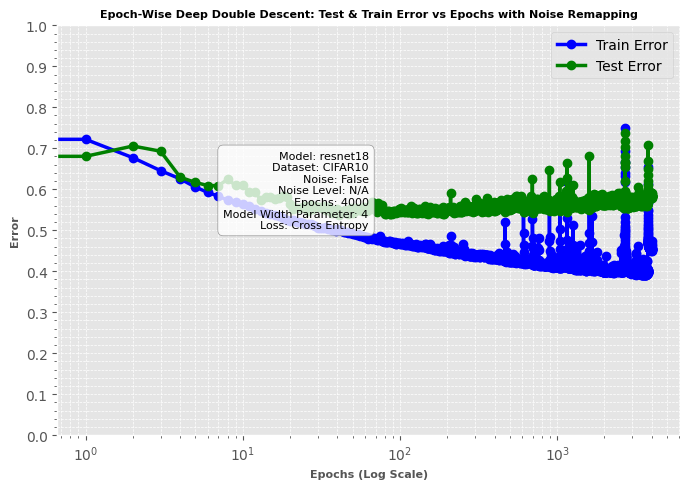

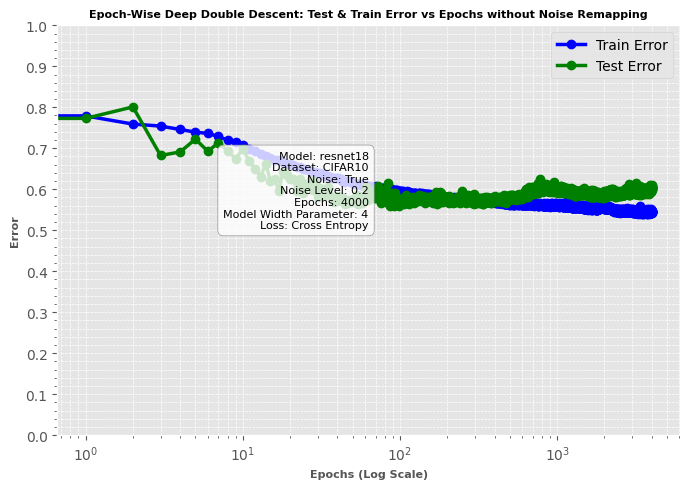

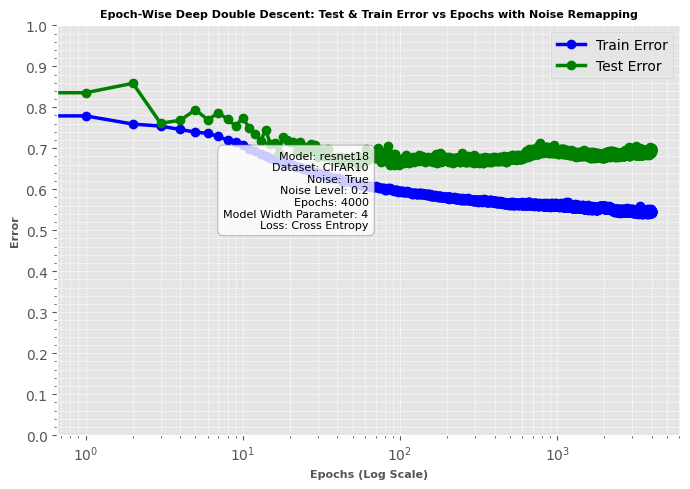

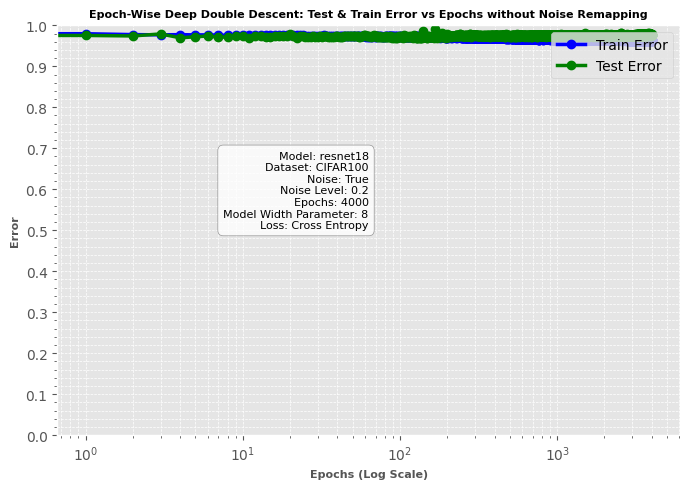

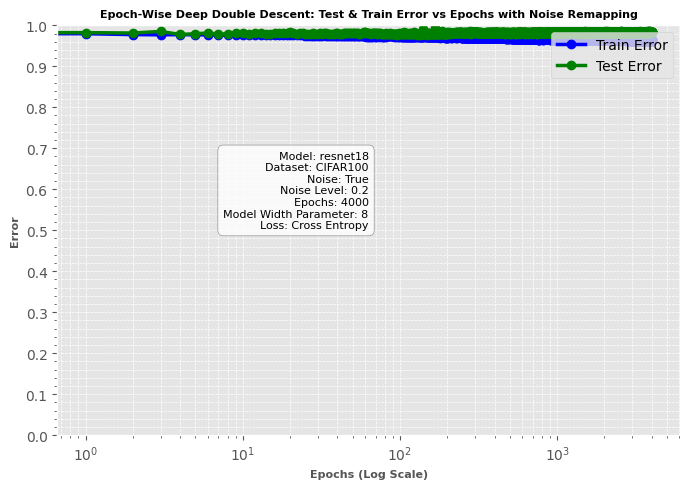

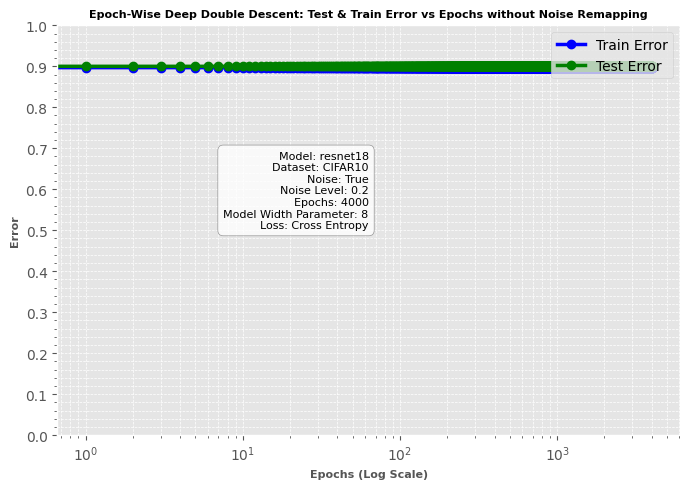

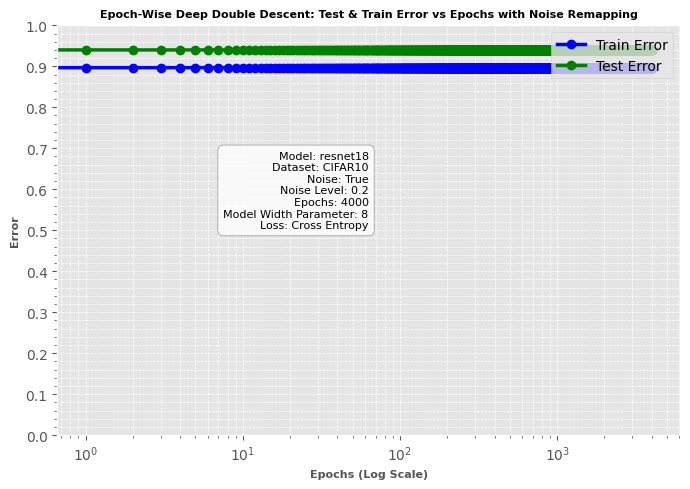

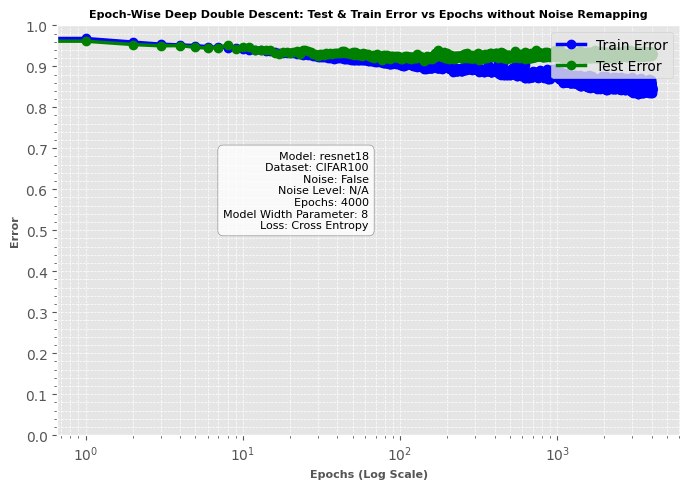

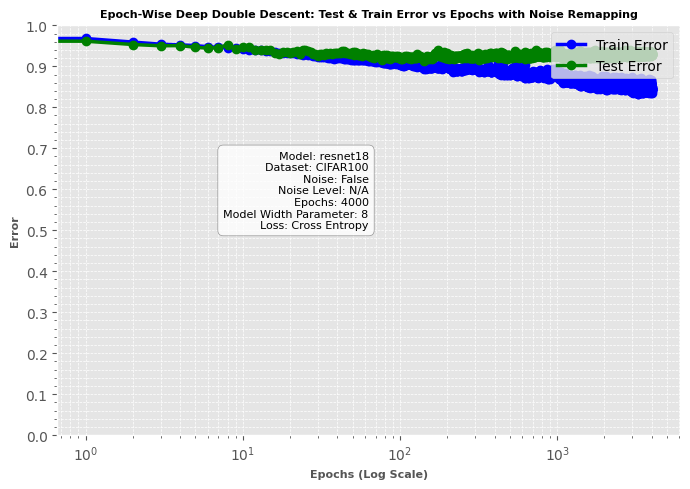

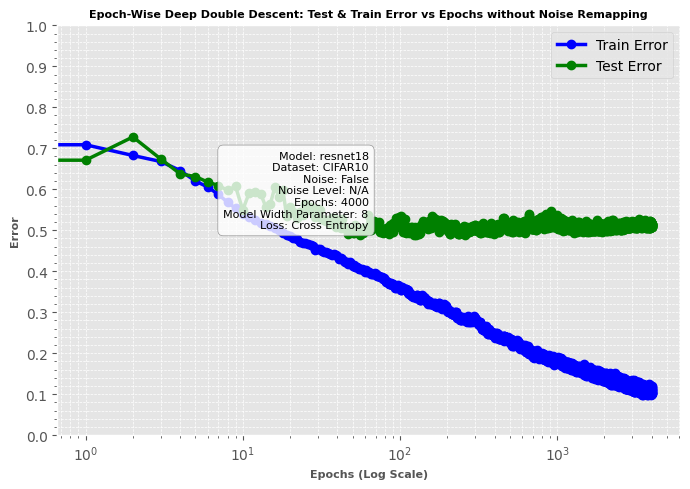

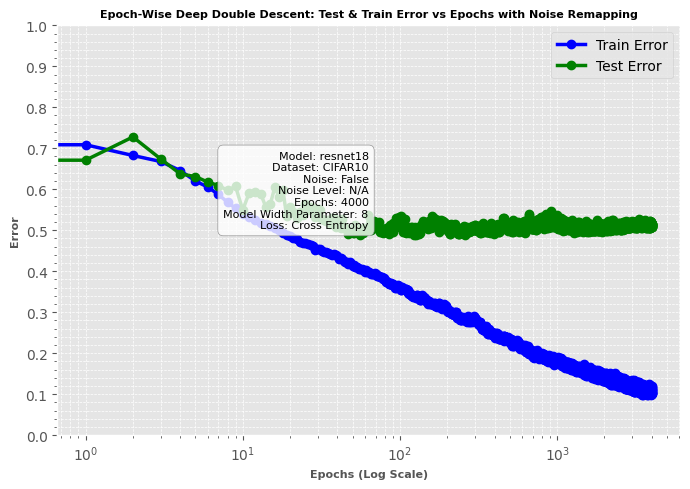

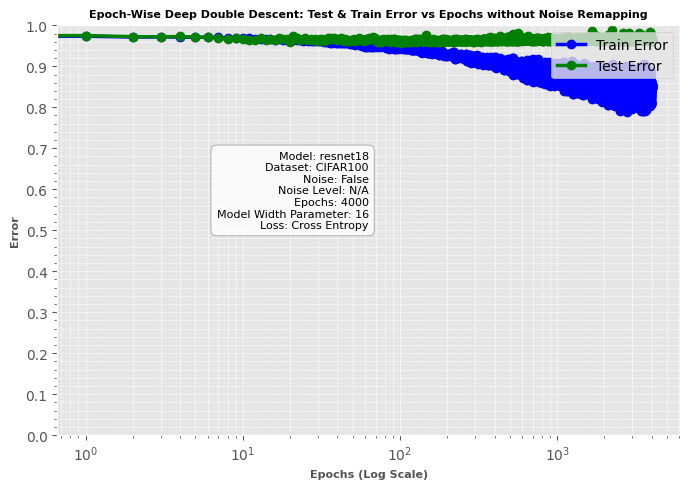

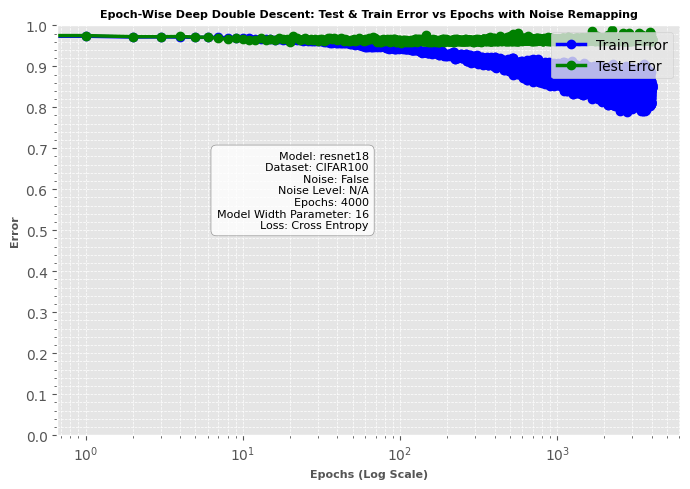

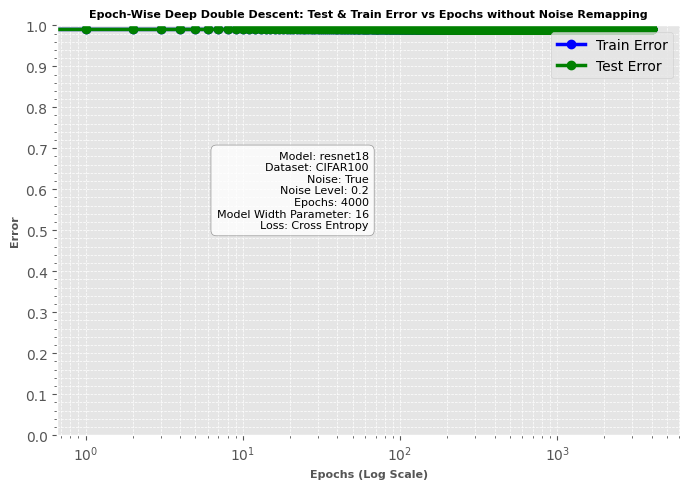

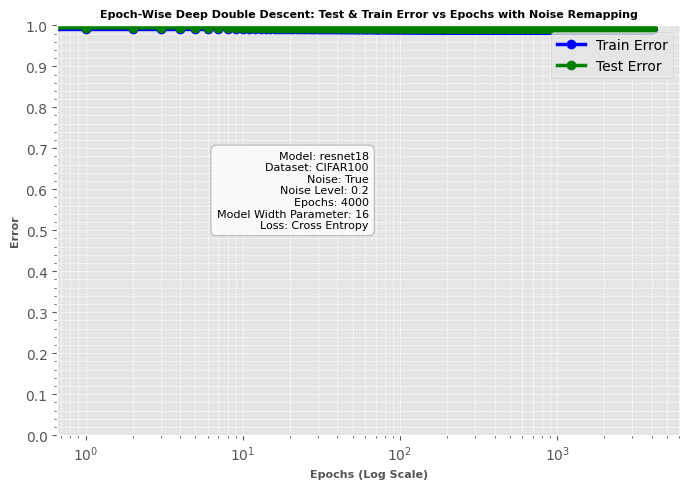

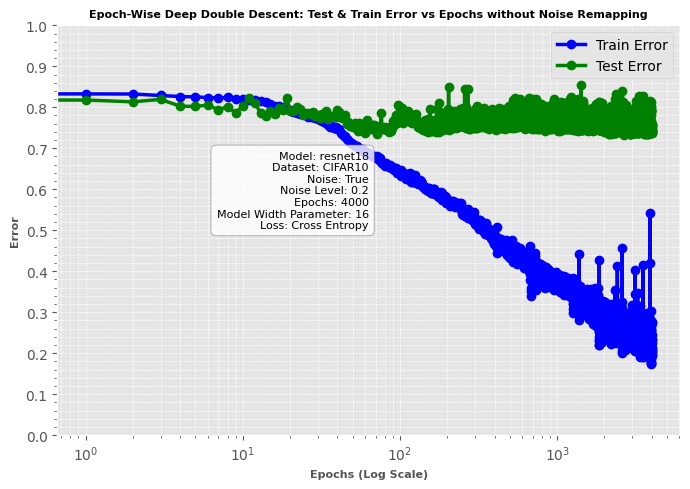

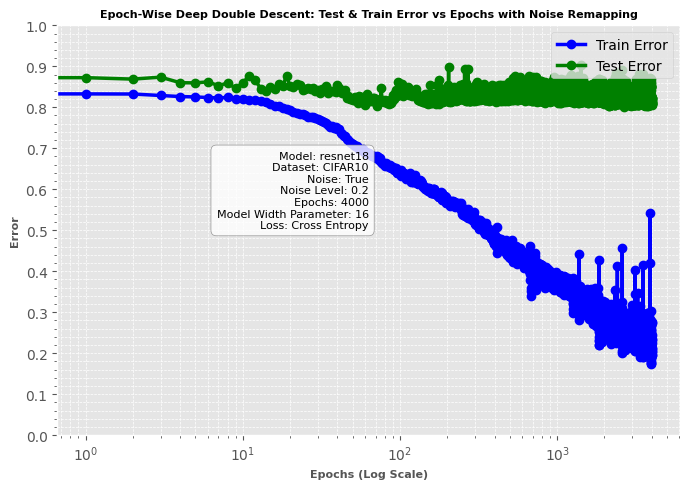

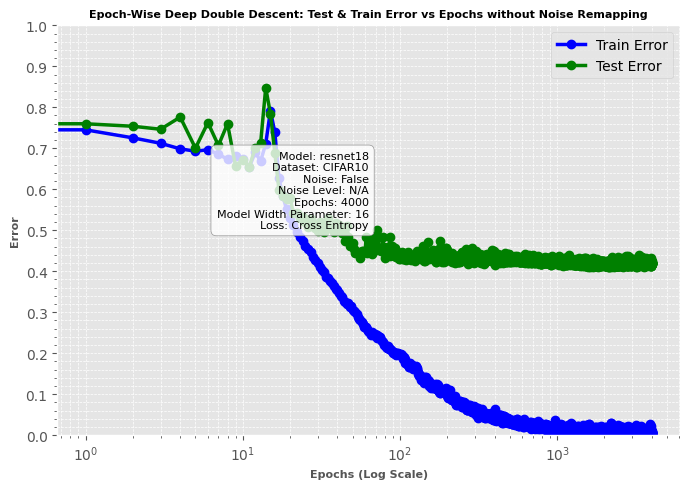

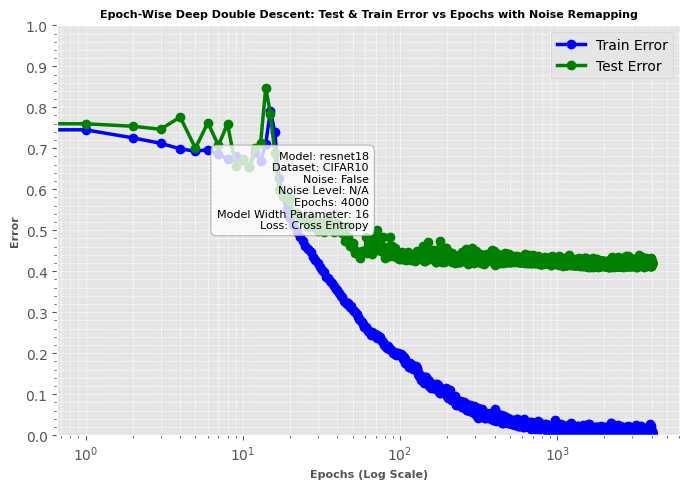

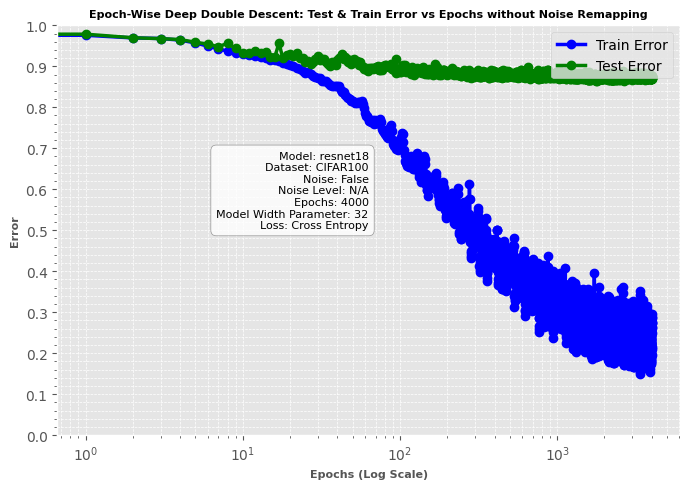

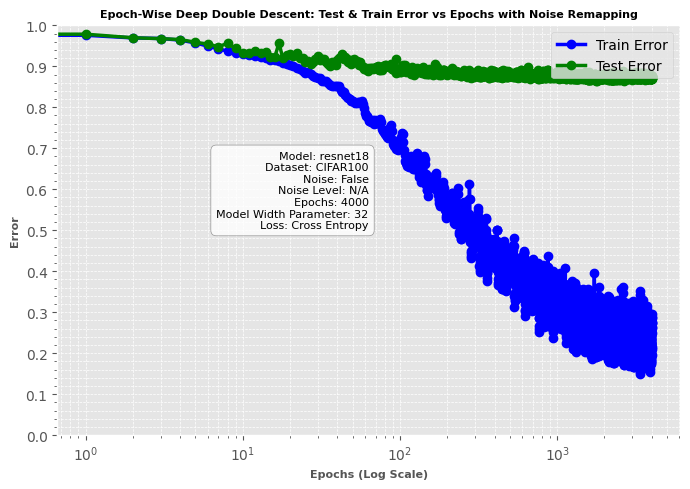

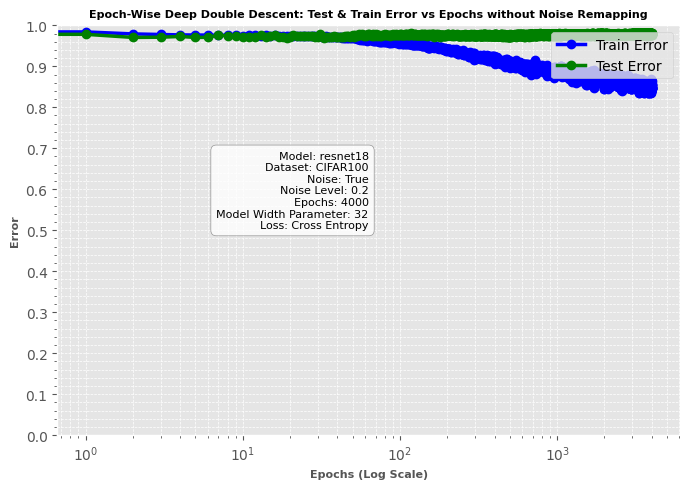

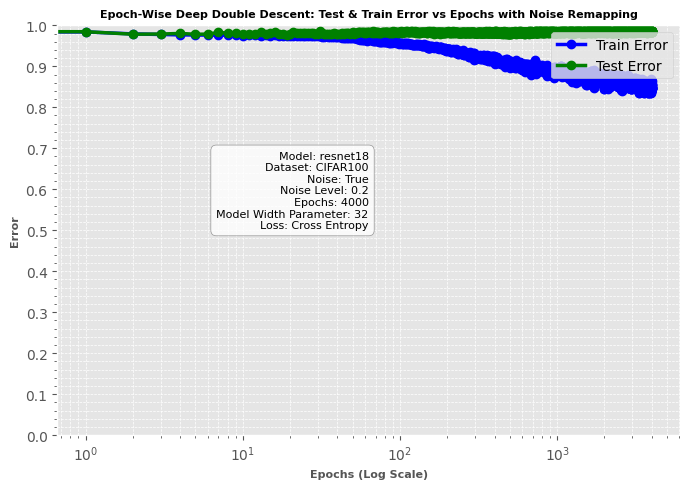

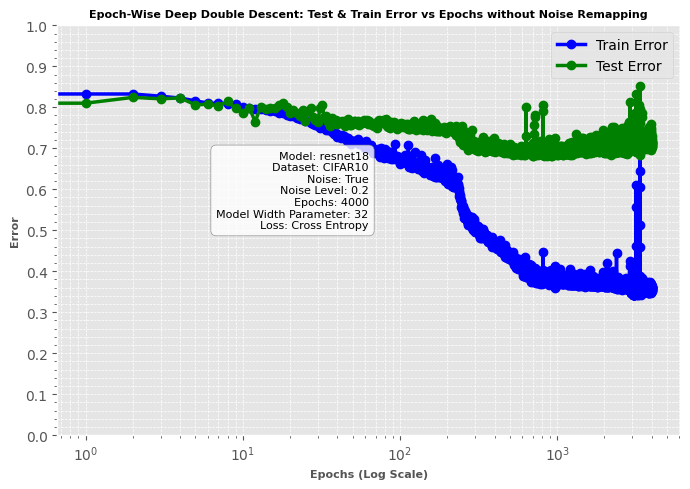

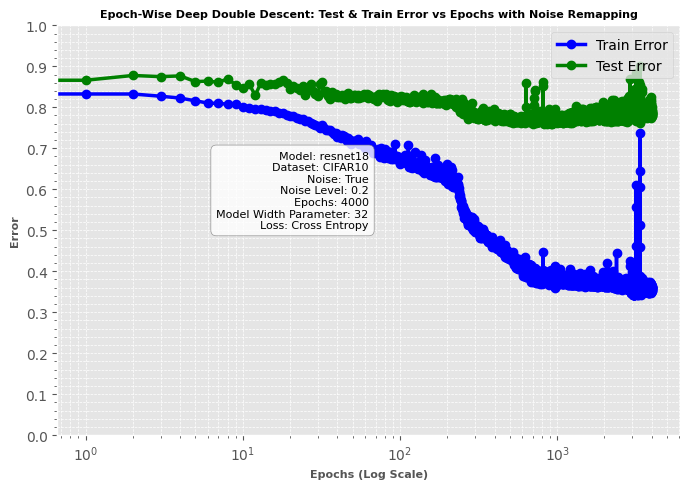

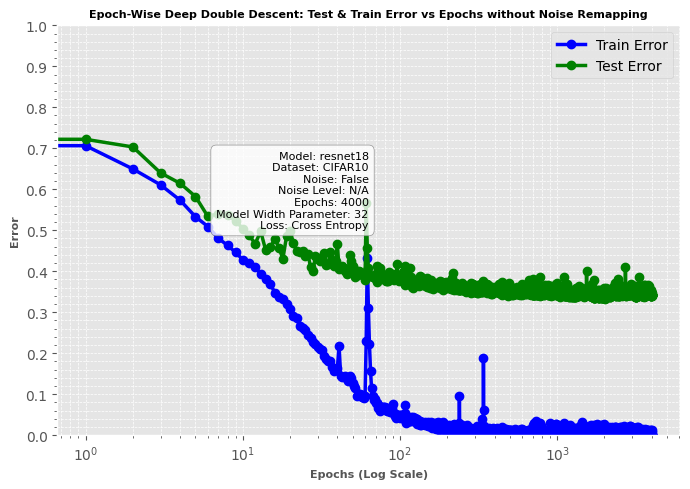

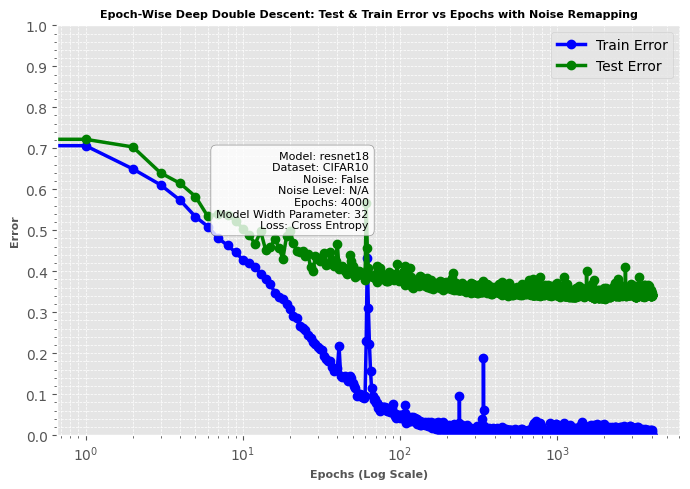

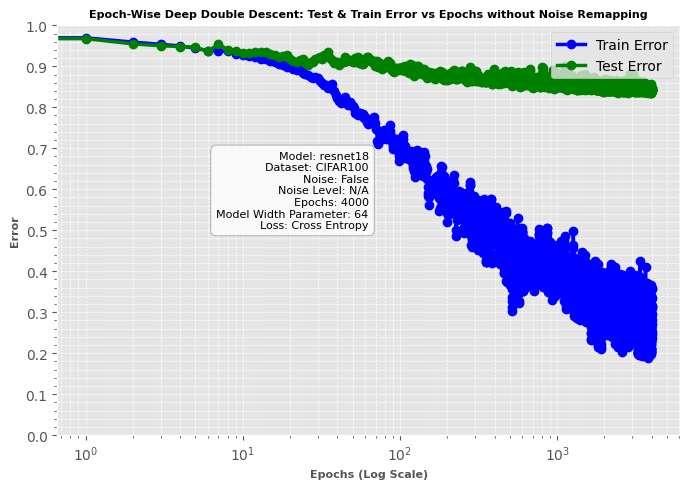

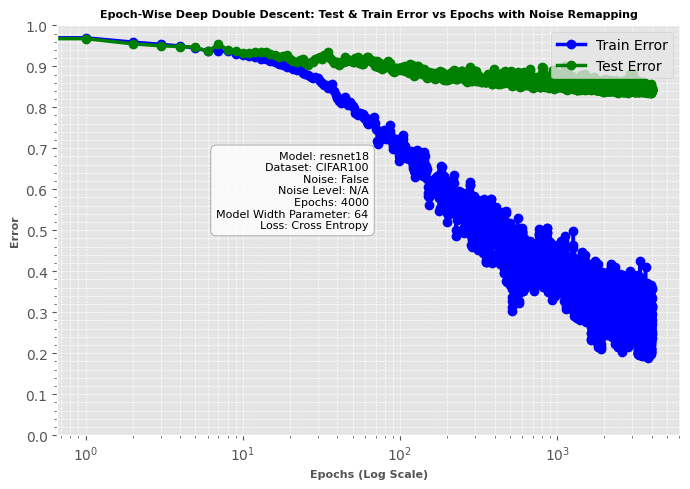

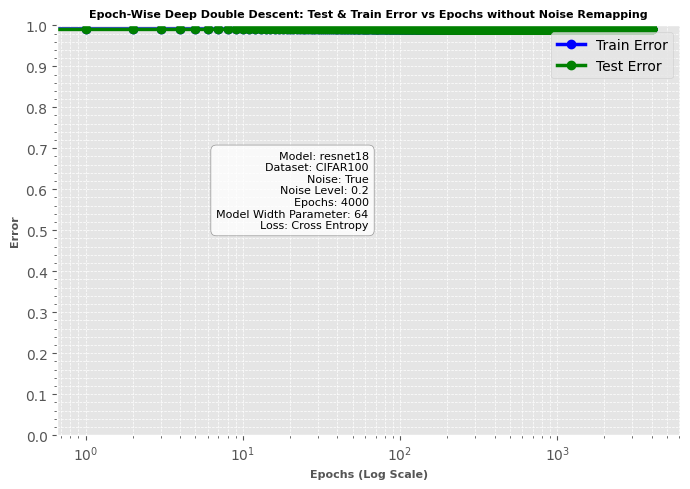

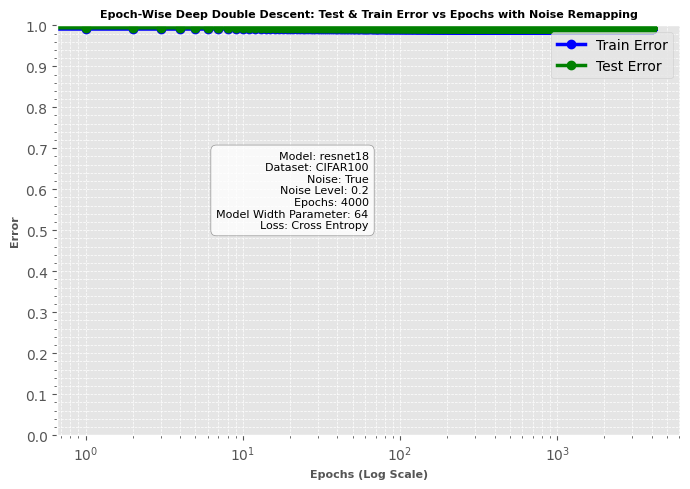

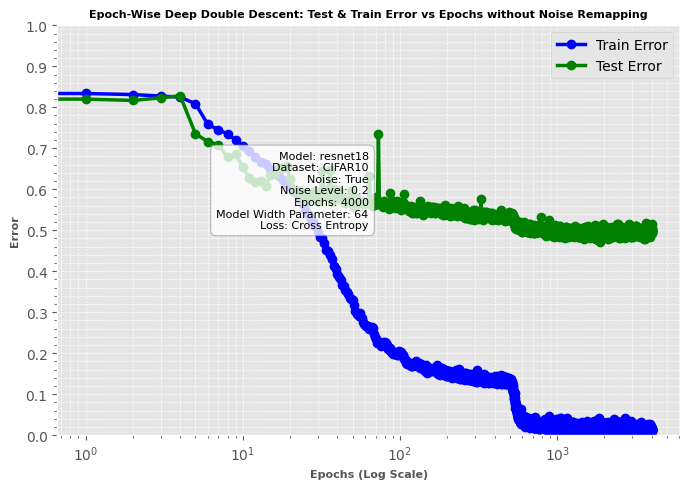

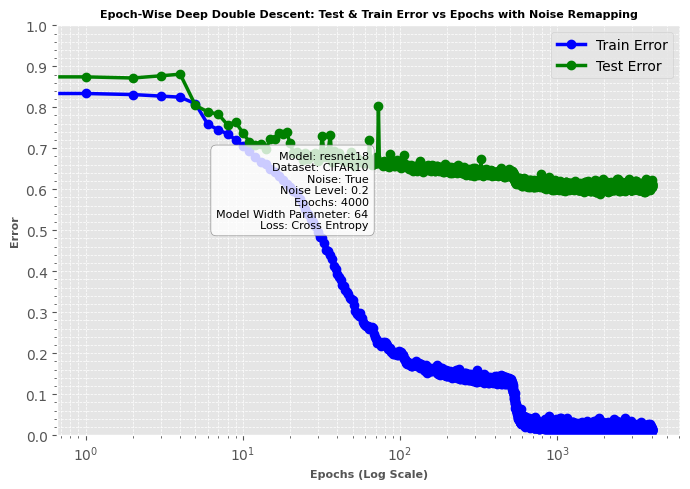

In [45]:
import matplotlib.pyplot as plt
import os

def plot_epoch_wise_ddd(epoch_wise_logs, combo, img_folder):
    exp_id = combo['id']
    exp_logs = epoch_wise_logs.get(exp_id, None)

    if exp_logs is None:
        print(f"No logs found for experiment ID: {exp_id}")
        return

    epochs = exp_logs.index.tolist()
    train_errors = (1 - exp_logs['train_SoftLabelsAccuracy']).tolist()
    val_errors = (1 - exp_logs['val_SoftLabelsAccuracy/test']).tolist()

    # Plotting
    plt.style.use('ggplot')  # Using ggplot style for aesthetic purposes
    fig, ax = plt.subplots(figsize=(7, 5))

    ax.plot(epochs, train_errors, 'o-', color='blue', linewidth=2.5, label='Train Error')
    ax.plot(epochs, val_errors, 'o-', color='green', linewidth=2.5, label='Test Error')

    ax.set_ylim(0, 1)  # Assuming error cannot be greater than 1
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_xscale('log')
    ax.set_xlabel("Epochs (Log Scale)", fontsize=8, fontweight='bold')
    ax.set_ylabel("Error", fontsize=8, fontweight='bold')
    ax.set_title(f"Epoch-Wise Deep Double Descent: Test & Train Error vs Epochs without Noise Remapping",fontsize=8, fontweight='bold')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.minorticks_on()

    ax.legend(fontsize='medium', loc='upper right')

    # Chosen text
    chosen_text = "\n".join([
        f"Model: {combo['model']}",
        f"Dataset: {combo['dataset']}",
        f"Noise: {combo['noise']}",
        f"Noise Level: {combo['noise_level'] if combo['noise'] else 'N/A'}",
        f"Epochs: {combo['epochs']}",
        f"Model Width Parameter: {combo['width_parameter']}",
        f"Loss: Cross Entropy"
    ])
    ax.text(0.5, 0.5, chosen_text, transform=ax.transAxes, fontsize=8, verticalalignment='bottom',
            horizontalalignment='right', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.8))

    # Save the figure
    noise_level = combo['noise_level'] if combo['noise_level'] is not None else 0.0
    filename = f"{combo['model']}_{combo['dataset']}_{noise_level}_{combo['epochs']}_{combo['width_parameter']}.png"
    save_path = os.path.join(img_folder, "no-error-remapping-epoch-wise-ddd", str(combo['width_parameter']),filename)
    if not os.path.exists(os.path.dirname(save_path)):
        os.makedirs(os.path.dirname(save_path))
    fig.tight_layout()
    fig.savefig(save_path)

    plt.show()

def plot_epoch_wise_ddd_with_remapping(epoch_wise_logs, combo, img_folder):
    exp_id = combo['id']
    out_features = combo['out_features']
    p = float(combo['noise_level']) if combo['noise_level'] is not None else 0.0
    exp_logs = epoch_wise_logs.get(exp_id, None)

    if exp_logs is None:
        print(f"No logs found for experiment ID: {exp_id}")
        return

    epochs = exp_logs.index.tolist()
    train_errors = (1 - exp_logs['train_SoftLabelsAccuracy']).tolist()
    val_accuracies = np.array(exp_logs['val_SoftLabelsAccuracy/test'])
    val_errors = 1.0 - (1-p)*(val_accuracies) + (1-val_accuracies)*p/(out_features-1)


    # Plotting
    plt.style.use('ggplot')  # Using ggplot style for aesthetic purposes
    fig, ax = plt.subplots(figsize=(7, 5))

    ax.plot(epochs, train_errors, 'o-', color='blue', linewidth=2.5, label='Train Error')
    ax.plot(epochs, val_errors, 'o-', color='green', linewidth=2.5, label='Test Error')

    ax.set_ylim(0, 1)  # Assuming error cannot be greater than 1
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_xscale('log')
    ax.set_xlabel("Epochs (Log Scale)", fontsize=8, fontweight='bold')
    ax.set_ylabel("Error", fontsize=8, fontweight='bold')
    ax.set_title(f"Epoch-Wise Deep Double Descent: Test & Train Error vs Epochs with Noise Remapping",fontsize=8, fontweight='bold')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.minorticks_on()

    ax.legend(fontsize='medium', loc='upper right')

    # Chosen text
    chosen_text = "\n".join([
        f"Model: {combo['model']}",
        f"Dataset: {combo['dataset']}",
        f"Noise: {combo['noise']}",
        f"Noise Level: {combo['noise_level'] if combo['noise'] else 'N/A'}",
        f"Epochs: {combo['epochs']}",
        f"Model Width Parameter: {combo['width_parameter']}",
        f"Loss: Cross Entropy"
    ])
    ax.text(0.5, 0.5, chosen_text, transform=ax.transAxes, fontsize=8, verticalalignment='bottom',
            horizontalalignment='right', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.8))

    # Save the figure
    noise_level = combo['noise_level'] if combo['noise_level'] is not None else 0.0
    filename = f"{combo['model']}_{combo['dataset']}_{noise_level}_{combo['epochs']}_{combo['width_parameter']}.png"
    save_path = os.path.join(img_folder, "error-remapping-epoch-wise-ddd", str(combo['width_parameter']), filename)
    if not os.path.exists(os.path.dirname(save_path)):
        os.makedirs(os.path.dirname(save_path))
    fig.tight_layout()
    fig.savefig(save_path)

    plt.show()
# Call the function for each combination
for combo in combinations:
    plot_epoch_wise_ddd(epoch_wise_logs, combo, img_folder)
    plot_epoch_wise_ddd_with_remapping(epoch_wise_logs, combo, img_folder)


## **combined plots**

In [46]:
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_selected_widths_epoch_wise_ddd(epoch_wise_logs, combinations, img_folder, selected_widths=[2, 16, 64]):
    grouped_combinations = {}
    for combo in combinations:
        key = (combo['model'], combo['dataset'], combo['noise'], combo['noise_level'], combo['epochs'])
        if key not in grouped_combinations:
            grouped_combinations[key] = []
        if combo['width_parameter'] in selected_widths:  # Only add selected widths
            grouped_combinations[key].append(combo)

    for key, combos in grouped_combinations.items():
        fig, ax = plt.subplots(figsize=(10, 7))  # Create a figure and an axes.
        plt.style.use('ggplot')  # Using ggplot style for aesthetic purposes

        for combo in combos:
            exp_id = combo['id']
            exp_logs = epoch_wise_logs.get(exp_id, None)

            if exp_logs is None:
                continue  # Skip if logs are missing

            epochs = exp_logs.index.tolist()
            val_errors = (1 - exp_logs['val_SoftLabelsAccuracy/test']).tolist()

            ax.plot(epochs, val_errors, label=f"Width {combo['width_parameter']}")

        ax.set_xscale('log')
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))  # Set y-ticks to be at intervals of 0.1
        ax.set_xlabel("Epochs (Log Scale)", fontsize=8, fontweight='bold')
        ax.set_ylabel('Test Error', fontsize=8, fontweight='bold')
        ax.set_title('Epoch-Wise Deep Double Descent: Test Error vs Epochs for Different Width Parameters', fontsize=8, fontweight='bold')
        ax.legend()
        ax.grid(True)

        # Chosen text
        chosen_text = "\n".join([
            f"Model: {key[0]}",
            f"Dataset: {key[1]}",
            f"Noise: {key[2]}",
            f"Noise Level: {key[3] if key[2] else 'N/A'}",
            f"Epochs: {key[4]}",
            f"Loss: Cross Entropy"
        ])
        ax.text(0.5, 0.5, chosen_text, transform=ax.transAxes, fontsize=8,
                 verticalalignment='bottom', horizontalalignment='right',
                 bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.8))

        # Saving the plot
        noise_level = combo['noise_level'] if combo['noise_level'] is not None else 0.0
        all = "all"
        filename = f"{combo['model']}_{combo['dataset']}_{noise_level}_{combo['epochs']}_{all}.png"
        save_path = os.path.join(img_folder, "no-error-remapping-epoch-wise-ddd", "varying-width", filename)
        if not os.path.exists(os.path.dirname(save_path)):
            os.makedirs(os.path.dirname(save_path))
        plt.savefig(save_path)
        plt.close()

# Example of how to call the function
plot_selected_widths_epoch_wise_ddd(epoch_wise_logs, combinations, img_folder)

In [47]:
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_noise_level_epoch_wise_ddd(epoch_wise_logs, combinations, img_folder, selected_noise_levels=[None, 0.0, 0.2, 0.4]):
    """
    Generates and saves plots of test errors across epochs for different noise levels.

    Parameters:
    - epoch_wise_logs: dict
        Logs of each epoch.
    - combinations: list of dicts
        Various combinations of parameters like model, dataset, noise, etc.
    - img_folder: str
        Path to the folder where the images will be saved.
    - selected_noise_levels: list, optional
        List of selected noise levels to be included in the plots.
    """

    grouped_combinations = {}
    for combo in combinations:
        key = (combo['model'], combo['dataset'], combo['width_parameter'], combo['epochs'])
        if key not in grouped_combinations:
            grouped_combinations[key] = []

        # Convert noise level to string for easier comparison
        noise_level_str = str(combo['noise_level'])
        if noise_level_str in map(str, selected_noise_levels):
            grouped_combinations[key].append(combo)

    for key, combos in grouped_combinations.items():
        fig, ax = plt.subplots(figsize=(10, 7))  # Create a figure and axes to plot on
        plt.style.use('ggplot')

        for combo in combos:
            exp_id = combo['id']
            exp_logs = epoch_wise_logs.get(exp_id, None)
            if exp_logs is None:
                continue  # Skip if logs are missing

            epochs = exp_logs.index.tolist()
            val_errors = (1 - exp_logs['val_SoftLabelsAccuracy/test']).tolist()

            if epochs and val_errors:  # Ensure that the lists are not empty
                label = f"Noise Level {combo['noise_level']}" if combo['noise_level'] is not None else "Noise Level 0.0"
                ax.plot(epochs, val_errors, label=label)

        # Set log scale for x-axis and step of 0.1 for y-axis ticks
        ax.set_xscale('log')
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))

        # Setting labels, titles, and legends
        ax.set_xlabel("Epochs (Log Scale)", fontsize=8, fontweight='bold')
        ax.set_ylabel('Test Error', fontsize=8, fontweight='bold')
        ax.set_title('Epoch-Wise Deep Double Descent: Test Error vs Epochs for Different Noise Levels', fontsize=8, fontweight='bold')
        ax.legend()
        ax.grid(True)

        # Adding chosen text as an annotation
        chosen_text = "\n".join([
            f"Model: {key[0]}",
            f"Dataset: {key[1]}",
            f"Width: {key[2]}",
            f"Epochs: {key[3]}",
            f"Loss: Cross Entropy"
        ])
        ax.text(0.5, 0.5, chosen_text, transform=ax.transAxes, fontsize=8, ha="right",
                bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.8))

        # Saving the plot
        filename = f"{key[0]}_{key[1]}_{key[2]}_{key[3]}_noise_level_all.png"
        save_path = os.path.join(img_folder, "no-error-remapping-epoch-wise-ddd", "varying-noise", filename)
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path)
        plt.close()

# You can call the function like this:
plot_noise_level_epoch_wise_ddd(epoch_wise_logs, combinations, img_folder)


## **Interpolatio done for cmaps**

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_test_error_heatmap(epoch_wise_logs, combinations, img_folder):
    plt.style.use('ggplot')

    widths = [1, 2, 4, 8, 16, 32, 64]

    for combo in combinations:
        if combo['epochs'] != 4000:
            continue

        model = combo['model']
        dataset = combo['dataset']
        noise_level = combo['noise_level']

        # Initializing error_matrix with NaNs
        error_matrix = np.full((4001, len(widths)), np.nan)  # assuming max epoch is 4000

        # Filtering combinations based on model, dataset, and noise_level
        filtered_combos = [c for c in combinations if c['model'] == model and c['dataset'] == dataset and c['noise_level'] == noise_level]

        for fc in filtered_combos:
            exp_id = fc['id']
            exp_logs = epoch_wise_logs.get(exp_id, None)
            if exp_logs is None:
                continue

            epochs = exp_logs.index.tolist()
            width = fc['width_parameter']
            test_errors = (1 - exp_logs['val_SoftLabelsAccuracy/test']).tolist()

            for epoch, error in zip(epochs, test_errors):
                width_index = widths.index(width)
                error_matrix[epoch][width_index] = error

        # Plotting
        plt.figure(figsize=(10, 7))
        plt.imshow(error_matrix, aspect='auto', cmap='jet', origin='lower')

        cbar = plt.colorbar()
        cbar.ax.set_ylabel('Test Error', rotation=270, fontsize=8, fontweight='bold', labelpad=20)

        plt.xticks(ticks=range(len(widths)), labels=widths, fontsize=8)
        plt.xlabel('Widths', fontsize=8, fontweight='bold')
        plt.ylabel('Epochs', fontsize=8, fontweight='bold')
        if (noise_level == None):
          noise_level = 0.0
        plt.title(f'Test Error Heatmap (Model: {model}, Dataset: {dataset}, Noise Level: {noise_level}), Loss: Cross Entropy', fontsize=8, fontweight='bold')

        # Saving the plot
        filename = f"{model}_{dataset}_noise_{noise_level}_error_heatmap.png"
        save_path = os.path.join(img_folder, "error_heatmaps", filename)
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path)
        plt.close()

# Example of how you might call this function
plot_test_error_heatmap(epoch_wise_logs, combinations, img_folder)
